In [34]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 안뜨게
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘(비지도학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차 기반으로 표준화(컬럼 당 숫자 편차가 다르니까.)
# 잘못된 학습을 정상화 시키는 목적으로 사용함
from sklearn.preprocessing import StandardScaler # 젤 유명 표준화

# train data랑 test data 나눔
from sklearn.model_selection import train_test_split

#교차검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score

# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다
# 예측시 : 주변의 데이터를 보고 가장 많은 결과로 결정한다
from sklearn.neighbors import KNeighborsClassifier

# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 트리
# 학습시 : 주어진 데이터를 갖고 질문을 생성한다
# 예측시 : 질문을 통해 최종 결과 예측
from sklearn.tree import DecisionTreeClassifier

# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정함
# 트리들을 사용한다
# 학습시 : 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 추출된 데이터를 트리의 개수만큼 생성해 각 트리들에게 주고 학습 수행
# 예측시 : 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종결과 결정
from sklearn.ensemble import RandomForestClassifier

# 부스팅 - 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리는 앙상블과 동일함
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최근접이웃
from sklearn.neighbors import KNeighborsRegressor

# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation

# 조기중단(케라스)
from tensorflow.keras.callbacks import EarlyStopping

### 데이터 불러오기

In [2]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다
X = df1.drop('target', axis = 1)
y = df1['target']

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [4]:
# 입력데이터 X의 컬럼 수 파악
n_features = X.shape[1]
n_features # 30개임

30

In [5]:
# 결과 데이터의 종류 수
a1 = y.value_counts() # benign 268개, maligant 186개
n_classes = len(a1) # 결과 데이터 2개임
n_classes 

2

In [6]:
# 결과 데이터가 문자였으니까 숫자로 변환
encoder1 = LabelEncoder()
y = encoder1.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# 표준화
# 머신러닝 -> 학습이 정상적으로 이루어지기 위해...
# 딥러닝 -> 학습 속도를 빠르게 하기 위해..
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

In [8]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [9]:
# 모델을 설계한다
model = Sequential()

# 첫 번째 은닉층은 input_dim 속성을 통해 입력층의 노드를 설정해 준다
# 일단 은닉층은 작게 시작해보고 학습이 안되면 쪼금씩 늘려본다
model.add(Dense(40, input_dim=n_features))
model.add(Activation('relu')) # 활성함수는 렐루 씀

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

# 출력층
# 2진 분류의 경우
# 출력층의 노드 개수는 1개
# 출력층의 활성화 함수는 sigmoid 함수 씀(결과 데이터가 0또는 1만 있음)
# sigmoid함수 그래프 보면 이해됨 0이랑 1로 수렴시키니까
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
# 모델 컴파일
# loss : 오차를 평가할 함수
# 2진분류 : binary_crossentropy
# optimizer : 경사하강법. adam을 사용함(무조건 아담 사용함)
# metrics : 학습 중 평가를 위한 함수. accuracy 분류니까 정확도 보려고
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# 학습한다.
# 매개변수 설명 /첫번째, 두번째 : 학습데이터/ 세번째 : 학습횟수(적당히, 무조건 많이)
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는 데이터 양
# validation_data : 검증용으로 사용할 데이터
history = model.fit(X, y, epochs = 10000, batch_size = 500)

# 결과보니까 loss (MSE)는 점점 줄어들고
# accracy 정확도는 점점 늘어남

Epoch 1/10000
1/1 [==============================] - 1s 714ms/step - loss: 0.8343 - accuracy: 0.2775
Epoch 2/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.8036 - accuracy: 0.3392
Epoch 3/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.7745 - accuracy: 0.4031
Epoch 4/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.7468 - accuracy: 0.4604
Epoch 5/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.7204 - accuracy: 0.5088
Epoch 6/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.6953 - accuracy: 0.5661
Epoch 7/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.6079
Epoch 8/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6492 - accuracy: 0.6476
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6278 - accuracy: 0.6806
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.6074 - accuracy: 0.7093
Epoch 

Epoch 83/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0927 - accuracy: 0.9736
Epoch 84/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0911 - accuracy: 0.9736
Epoch 85/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0896 - accuracy: 0.9736
Epoch 86/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0881 - accuracy: 0.9736
Epoch 87/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0867 - accuracy: 0.9736
Epoch 88/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0853 - accuracy: 0.9758
Epoch 89/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0840 - accuracy: 0.9758
Epoch 90/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.9758
Epoch 91/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0814 - accuracy: 0.9758
Epoch 92/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.9758

1/1 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 165/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 166/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.9890
Epoch 167/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.9890
Epoch 168/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9890
Epoch 169/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.9890
Epoch 170/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.9890
Epoch 171/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9890
Epoch 172/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0320 - accuracy: 0.9890
Epoch 173/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9890
Epoch 

1/1 [==============================] - 0s 9ms/step - loss: 0.0134 - accuracy: 0.9978
Epoch 246/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.9978
Epoch 247/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9978
Epoch 248/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.9978
Epoch 249/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9978
Epoch 250/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.9978
Epoch 251/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9978
Epoch 252/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9978
Epoch 253/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.9978
Epoch 254/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.9978
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 327/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 328/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 329/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 330/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 331/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 332/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 333/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 334/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 335/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 408/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 409/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 410/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 411/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 412/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 413/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 414/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 415/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 416/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 489/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 490/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 491/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 492/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 493/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 494/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 495/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 496/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 497/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 8.5748e-04 - accuracy: 1.0000
Epoch 569/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.5304e-04 - accuracy: 1.0000
Epoch 570/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.4859e-04 - accuracy: 1.0000
Epoch 571/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.4424e-04 - accuracy: 1.0000
Epoch 572/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3995e-04 - accuracy: 1.0000
Epoch 573/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.3565e-04 - accuracy: 1.0000
Epoch 574/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3144e-04 - accuracy: 1.0000
Epoch 575/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.2719e-04 - accuracy: 1.0000
Epoch 576/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.2300e-04 - accuracy: 1.0000
Epoch 577/10000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 6ms/step - loss: 5.9598e-04 - accuracy: 1.0000
Epoch 647/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.9342e-04 - accuracy: 1.0000
Epoch 648/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.9094e-04 - accuracy: 1.0000
Epoch 649/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.8851e-04 - accuracy: 1.0000
Epoch 650/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8599e-04 - accuracy: 1.0000
Epoch 651/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.8353e-04 - accuracy: 1.0000
Epoch 652/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.8109e-04 - accuracy: 1.0000
Epoch 653/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7866e-04 - accuracy: 1.0000
Epoch 654/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7623e-04 - accuracy: 1.0000
Epoch 655/10000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 4.3840e-04 - accuracy: 1.0000
Epoch 725/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3675e-04 - accuracy: 1.0000
Epoch 726/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3515e-04 - accuracy: 1.0000
Epoch 727/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.3352e-04 - accuracy: 1.0000
Epoch 728/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3187e-04 - accuracy: 1.0000
Epoch 729/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3029e-04 - accuracy: 1.0000
Epoch 730/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2868e-04 - accuracy: 1.0000
Epoch 731/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2711e-04 - accuracy: 1.0000
Epoch 732/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2553e-04 - accuracy: 1.0000
Epoch 733/10000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 7ms/step - loss: 3.3298e-04 - accuracy: 1.0000
Epoch 803/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.3189e-04 - accuracy: 1.0000
Epoch 804/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3077e-04 - accuracy: 1.0000
Epoch 805/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2971e-04 - accuracy: 1.0000
Epoch 806/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2865e-04 - accuracy: 1.0000
Epoch 807/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2756e-04 - accuracy: 1.0000
Epoch 808/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2649e-04 - accuracy: 1.0000
Epoch 809/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2543e-04 - accuracy: 1.0000
Epoch 810/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2438e-04 - accuracy: 1.0000
Epoch 811/10000
1/1 [==============================] - 0s 6ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 2.6134e-04 - accuracy: 1.0000
Epoch 881/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6057e-04 - accuracy: 1.0000
Epoch 882/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5980e-04 - accuracy: 1.0000
Epoch 883/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5905e-04 - accuracy: 1.0000
Epoch 884/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5828e-04 - accuracy: 1.0000
Epoch 885/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5752e-04 - accuracy: 1.0000
Epoch 886/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5678e-04 - accuracy: 1.0000
Epoch 887/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.5603e-04 - accuracy: 1.0000
Epoch 888/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5528e-04 - accuracy: 1.0000
Epoch 889/10000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 2.0998e-04 - accuracy: 1.0000
Epoch 959/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0942e-04 - accuracy: 1.0000
Epoch 960/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0886e-04 - accuracy: 1.0000
Epoch 961/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0831e-04 - accuracy: 1.0000
Epoch 962/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0776e-04 - accuracy: 1.0000
Epoch 963/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0721e-04 - accuracy: 1.0000
Epoch 964/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0667e-04 - accuracy: 1.0000
Epoch 965/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0611e-04 - accuracy: 1.0000
Epoch 966/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0557e-04 - accuracy: 1.0000
Epoch 967/10000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 6ms/step - loss: 1.7254e-04 - accuracy: 1.0000
Epoch 1036/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7212e-04 - accuracy: 1.0000
Epoch 1037/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7169e-04 - accuracy: 1.0000
Epoch 1038/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7127e-04 - accuracy: 1.0000
Epoch 1039/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7085e-04 - accuracy: 1.0000
Epoch 1040/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7043e-04 - accuracy: 1.0000
Epoch 1041/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7002e-04 - accuracy: 1.0000
Epoch 1042/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6960e-04 - accuracy: 1.0000
Epoch 1043/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6919e-04 - accuracy: 1.0000
Epoch 1044/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 4ms/step - loss: 1.4403e-04 - accuracy: 1.0000
Epoch 1113/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4369e-04 - accuracy: 1.0000
Epoch 1114/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4337e-04 - accuracy: 1.0000
Epoch 1115/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4305e-04 - accuracy: 1.0000
Epoch 1116/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4273e-04 - accuracy: 1.0000
Epoch 1117/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4242e-04 - accuracy: 1.0000
Epoch 1118/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.4210e-04 - accuracy: 1.0000
Epoch 1119/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4178e-04 - accuracy: 1.0000
Epoch 1120/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4146e-04 - accuracy: 1.0000
Epoch 1121/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.2189e-04 - accuracy: 1.0000
Epoch 1190/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2165e-04 - accuracy: 1.0000
Epoch 1191/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2139e-04 - accuracy: 1.0000
Epoch 1192/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2114e-04 - accuracy: 1.0000
Epoch 1193/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2089e-04 - accuracy: 1.0000
Epoch 1194/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2064e-04 - accuracy: 1.0000
Epoch 1195/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2039e-04 - accuracy: 1.0000
Epoch 1196/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2014e-04 - accuracy: 1.0000
Epoch 1197/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1989e-04 - accuracy: 1.0000
Epoch 1198/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.0434e-04 - accuracy: 1.0000
Epoch 1267/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0413e-04 - accuracy: 1.0000
Epoch 1268/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.0393e-04 - accuracy: 1.0000
Epoch 1269/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0373e-04 - accuracy: 1.0000
Epoch 1270/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0353e-04 - accuracy: 1.0000
Epoch 1271/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0333e-04 - accuracy: 1.0000
Epoch 1272/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0312e-04 - accuracy: 1.0000
Epoch 1273/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0292e-04 - accuracy: 1.0000
Epoch 1274/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0272e-04 - accuracy: 1.0000
Epoch 1275/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 7ms/step - loss: 9.0177e-05 - accuracy: 1.0000
Epoch 1344/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0015e-05 - accuracy: 1.0000
Epoch 1345/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9851e-05 - accuracy: 1.0000
Epoch 1346/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9686e-05 - accuracy: 1.0000
Epoch 1347/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.9520e-05 - accuracy: 1.0000
Epoch 1348/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9357e-05 - accuracy: 1.0000
Epoch 1349/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.9195e-05 - accuracy: 1.0000
Epoch 1350/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9033e-05 - accuracy: 1.0000
Epoch 1351/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.8869e-05 - accuracy: 1.0000
Epoch 1352/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.8097e-05 - accuracy: 1.0000
Epoch 1421/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.7954e-05 - accuracy: 1.0000
Epoch 1422/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7812e-05 - accuracy: 1.0000
Epoch 1423/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7669e-05 - accuracy: 1.0000
Epoch 1424/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.7531e-05 - accuracy: 1.0000
Epoch 1425/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.7393e-05 - accuracy: 1.0000
Epoch 1426/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.7250e-05 - accuracy: 1.0000
Epoch 1427/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7109e-05 - accuracy: 1.0000
Epoch 1428/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6972e-05 - accuracy: 1.0000
Epoch 1429/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 9ms/step - loss: 6.8187e-05 - accuracy: 1.0000
Epoch 1498/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.8071e-05 - accuracy: 1.0000
Epoch 1499/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.7953e-05 - accuracy: 1.0000
Epoch 1500/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.7840e-05 - accuracy: 1.0000
Epoch 1501/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.7725e-05 - accuracy: 1.0000
Epoch 1502/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.7607e-05 - accuracy: 1.0000
Epoch 1503/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.7495e-05 - accuracy: 1.0000
Epoch 1504/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.7380e-05 - accuracy: 1.0000
Epoch 1505/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.7264e-05 - accuracy: 1.0000
Epoch 1506/10000
1/1 [==============================] - 0s 7ms

1/1 [==============================] - 0s 9ms/step - loss: 6.0019e-05 - accuracy: 1.0000
Epoch 1575/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.9924e-05 - accuracy: 1.0000
Epoch 1576/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.9827e-05 - accuracy: 1.0000
Epoch 1577/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.9729e-05 - accuracy: 1.0000
Epoch 1578/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.9632e-05 - accuracy: 1.0000
Epoch 1579/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.9538e-05 - accuracy: 1.0000
Epoch 1580/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.9443e-05 - accuracy: 1.0000
Epoch 1581/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.9346e-05 - accuracy: 1.0000
Epoch 1582/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.9251e-05 - accuracy: 1.0000
Epoch 1583/10000
1/1 [==============================] - 0s 10ms

1/1 [==============================] - 0s 10ms/step - loss: 5.3174e-05 - accuracy: 1.0000
Epoch 1652/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.3093e-05 - accuracy: 1.0000
Epoch 1653/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.3011e-05 - accuracy: 1.0000
Epoch 1654/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2929e-05 - accuracy: 1.0000
Epoch 1655/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2848e-05 - accuracy: 1.0000
Epoch 1656/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2767e-05 - accuracy: 1.0000
Epoch 1657/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.2686e-05 - accuracy: 1.0000
Epoch 1658/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2605e-05 - accuracy: 1.0000
Epoch 1659/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2525e-05 - accuracy: 1.0000
Epoch 1660/10000
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 9ms/step - loss: 4.7368e-05 - accuracy: 1.0000
Epoch 1729/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7299e-05 - accuracy: 1.0000
Epoch 1730/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.7230e-05 - accuracy: 1.0000
Epoch 1731/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.7160e-05 - accuracy: 1.0000
Epoch 1732/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7093e-05 - accuracy: 1.0000
Epoch 1733/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.7025e-05 - accuracy: 1.0000
Epoch 1734/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.6954e-05 - accuracy: 1.0000
Epoch 1735/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.6887e-05 - accuracy: 1.0000
Epoch 1736/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.6819e-05 - accuracy: 1.0000
Epoch 1737/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 4.2420e-05 - accuracy: 1.0000
Epoch 1806/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2360e-05 - accuracy: 1.0000
Epoch 1807/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2301e-05 - accuracy: 1.0000
Epoch 1808/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2242e-05 - accuracy: 1.0000
Epoch 1809/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2182e-05 - accuracy: 1.0000
Epoch 1810/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2124e-05 - accuracy: 1.0000
Epoch 1811/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2065e-05 - accuracy: 1.0000
Epoch 1812/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.2006e-05 - accuracy: 1.0000
Epoch 1813/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.1948e-05 - accuracy: 1.0000
Epoch 1814/10000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 9ms/step - loss: 3.8172e-05 - accuracy: 1.0000
Epoch 1883/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.8121e-05 - accuracy: 1.0000
Epoch 1884/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.8070e-05 - accuracy: 1.0000
Epoch 1885/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.8019e-05 - accuracy: 1.0000
Epoch 1886/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7969e-05 - accuracy: 1.0000
Epoch 1887/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7918e-05 - accuracy: 1.0000
Epoch 1888/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.7867e-05 - accuracy: 1.0000
Epoch 1889/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.7817e-05 - accuracy: 1.0000
Epoch 1890/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7766e-05 - accuracy: 1.0000
Epoch 1891/10000
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 6ms/step - loss: 3.4508e-05 - accuracy: 1.0000
Epoch 1960/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4465e-05 - accuracy: 1.0000
Epoch 1961/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4420e-05 - accuracy: 1.0000
Epoch 1962/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4376e-05 - accuracy: 1.0000
Epoch 1963/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4332e-05 - accuracy: 1.0000
Epoch 1964/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4288e-05 - accuracy: 1.0000
Epoch 1965/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4244e-05 - accuracy: 1.0000
Epoch 1966/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4201e-05 - accuracy: 1.0000
Epoch 1967/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4157e-05 - accuracy: 1.0000
Epoch 1968/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 3.1313e-05 - accuracy: 1.0000
Epoch 2037/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.1274e-05 - accuracy: 1.0000
Epoch 2038/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.1235e-05 - accuracy: 1.0000
Epoch 2039/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1197e-05 - accuracy: 1.0000
Epoch 2040/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.1159e-05 - accuracy: 1.0000
Epoch 2041/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1120e-05 - accuracy: 1.0000
Epoch 2042/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1081e-05 - accuracy: 1.0000
Epoch 2043/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.1043e-05 - accuracy: 1.0000
Epoch 2044/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1005e-05 - accuracy: 1.0000
Epoch 2045/10000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.8513e-05 - accuracy: 1.0000
Epoch 2114/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.8478e-05 - accuracy: 1.0000
Epoch 2115/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.8444e-05 - accuracy: 1.0000
Epoch 2116/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8411e-05 - accuracy: 1.0000
Epoch 2117/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8377e-05 - accuracy: 1.0000
Epoch 2118/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.8343e-05 - accuracy: 1.0000
Epoch 2119/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8308e-05 - accuracy: 1.0000
Epoch 2120/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.8275e-05 - accuracy: 1.0000
Epoch 2121/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.8242e-05 - accuracy: 1.0000
Epoch 2122/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.6039e-05 - accuracy: 1.0000
Epoch 2191/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.6010e-05 - accuracy: 1.0000
Epoch 2192/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5980e-05 - accuracy: 1.0000
Epoch 2193/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.5949e-05 - accuracy: 1.0000
Epoch 2194/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5919e-05 - accuracy: 1.0000
Epoch 2195/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.5889e-05 - accuracy: 1.0000
Epoch 2196/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5859e-05 - accuracy: 1.0000
Epoch 2197/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5830e-05 - accuracy: 1.0000
Epoch 2198/10000
1/1 [==============================] - 0s 22ms/step - loss: 2.5800e-05 - accuracy: 1.0000
Epoch 2199/10000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 5ms/step - loss: 2.3847e-05 - accuracy: 1.0000
Epoch 2268/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3820e-05 - accuracy: 1.0000
Epoch 2269/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3794e-05 - accuracy: 1.0000
Epoch 2270/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3767e-05 - accuracy: 1.0000
Epoch 2271/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3740e-05 - accuracy: 1.0000
Epoch 2272/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3713e-05 - accuracy: 1.0000
Epoch 2273/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3687e-05 - accuracy: 1.0000
Epoch 2274/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3660e-05 - accuracy: 1.0000
Epoch 2275/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3634e-05 - accuracy: 1.0000
Epoch 2276/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.1894e-05 - accuracy: 1.0000
Epoch 2345/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1870e-05 - accuracy: 1.0000
Epoch 2346/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1846e-05 - accuracy: 1.0000
Epoch 2347/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1822e-05 - accuracy: 1.0000
Epoch 2348/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.1799e-05 - accuracy: 1.0000
Epoch 2349/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1775e-05 - accuracy: 1.0000
Epoch 2350/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1751e-05 - accuracy: 1.0000
Epoch 2351/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1727e-05 - accuracy: 1.0000
Epoch 2352/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1703e-05 - accuracy: 1.0000
Epoch 2353/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.0146e-05 - accuracy: 1.0000
Epoch 2422/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0125e-05 - accuracy: 1.0000
Epoch 2423/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0103e-05 - accuracy: 1.0000
Epoch 2424/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0082e-05 - accuracy: 1.0000
Epoch 2425/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0061e-05 - accuracy: 1.0000
Epoch 2426/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0039e-05 - accuracy: 1.0000
Epoch 2427/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0018e-05 - accuracy: 1.0000
Epoch 2428/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9997e-05 - accuracy: 1.0000
Epoch 2429/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9975e-05 - accuracy: 1.0000
Epoch 2430/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 4ms/step - loss: 1.8576e-05 - accuracy: 1.0000
Epoch 2499/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8557e-05 - accuracy: 1.0000
Epoch 2500/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8538e-05 - accuracy: 1.0000
Epoch 2501/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8519e-05 - accuracy: 1.0000
Epoch 2502/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8499e-05 - accuracy: 1.0000
Epoch 2503/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8480e-05 - accuracy: 1.0000
Epoch 2504/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8461e-05 - accuracy: 1.0000
Epoch 2505/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8442e-05 - accuracy: 1.0000
Epoch 2506/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8423e-05 - accuracy: 1.0000
Epoch 2507/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.7146e-05 - accuracy: 1.0000
Epoch 2576/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7129e-05 - accuracy: 1.0000
Epoch 2577/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7111e-05 - accuracy: 1.0000
Epoch 2578/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7094e-05 - accuracy: 1.0000
Epoch 2579/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7076e-05 - accuracy: 1.0000
Epoch 2580/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7058e-05 - accuracy: 1.0000
Epoch 2581/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7041e-05 - accuracy: 1.0000
Epoch 2582/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7024e-05 - accuracy: 1.0000
Epoch 2583/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7006e-05 - accuracy: 1.0000
Epoch 2584/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.5853e-05 - accuracy: 1.0000
Epoch 2653/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5837e-05 - accuracy: 1.0000
Epoch 2654/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5822e-05 - accuracy: 1.0000
Epoch 2655/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5806e-05 - accuracy: 1.0000
Epoch 2656/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5789e-05 - accuracy: 1.0000
Epoch 2657/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5774e-05 - accuracy: 1.0000
Epoch 2658/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5758e-05 - accuracy: 1.0000
Epoch 2659/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5742e-05 - accuracy: 1.0000
Epoch 2660/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5726e-05 - accuracy: 1.0000
Epoch 2661/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.4684e-05 - accuracy: 1.0000
Epoch 2730/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4669e-05 - accuracy: 1.0000
Epoch 2731/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4655e-05 - accuracy: 1.0000
Epoch 2732/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4641e-05 - accuracy: 1.0000
Epoch 2733/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4626e-05 - accuracy: 1.0000
Epoch 2734/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4612e-05 - accuracy: 1.0000
Epoch 2735/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4597e-05 - accuracy: 1.0000
Epoch 2736/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4583e-05 - accuracy: 1.0000
Epoch 2737/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4569e-05 - accuracy: 1.0000
Epoch 2738/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 7ms/step - loss: 1.3621e-05 - accuracy: 1.0000
Epoch 2807/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3607e-05 - accuracy: 1.0000
Epoch 2808/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3594e-05 - accuracy: 1.0000
Epoch 2809/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3581e-05 - accuracy: 1.0000
Epoch 2810/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3568e-05 - accuracy: 1.0000
Epoch 2811/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3555e-05 - accuracy: 1.0000
Epoch 2812/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3542e-05 - accuracy: 1.0000
Epoch 2813/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.3529e-05 - accuracy: 1.0000
Epoch 2814/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3516e-05 - accuracy: 1.0000
Epoch 2815/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.2653e-05 - accuracy: 1.0000
Epoch 2884/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2640e-05 - accuracy: 1.0000
Epoch 2885/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2629e-05 - accuracy: 1.0000
Epoch 2886/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2617e-05 - accuracy: 1.0000
Epoch 2887/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2605e-05 - accuracy: 1.0000
Epoch 2888/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2593e-05 - accuracy: 1.0000
Epoch 2889/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2581e-05 - accuracy: 1.0000
Epoch 2890/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2569e-05 - accuracy: 1.0000
Epoch 2891/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2557e-05 - accuracy: 1.0000
Epoch 2892/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.1767e-05 - accuracy: 1.0000
Epoch 2961/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1756e-05 - accuracy: 1.0000
Epoch 2962/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1745e-05 - accuracy: 1.0000
Epoch 2963/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1734e-05 - accuracy: 1.0000
Epoch 2964/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1723e-05 - accuracy: 1.0000
Epoch 2965/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1712e-05 - accuracy: 1.0000
Epoch 2966/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1701e-05 - accuracy: 1.0000
Epoch 2967/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1690e-05 - accuracy: 1.0000
Epoch 2968/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1679e-05 - accuracy: 1.0000
Epoch 2969/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.0960e-05 - accuracy: 1.0000
Epoch 3038/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0950e-05 - accuracy: 1.0000
Epoch 3039/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0940e-05 - accuracy: 1.0000
Epoch 3040/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0930e-05 - accuracy: 1.0000
Epoch 3041/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0920e-05 - accuracy: 1.0000
Epoch 3042/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0911e-05 - accuracy: 1.0000
Epoch 3043/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0901e-05 - accuracy: 1.0000
Epoch 3044/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0891e-05 - accuracy: 1.0000
Epoch 3045/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0881e-05 - accuracy: 1.0000
Epoch 3046/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.0230e-05 - accuracy: 1.0000
Epoch 3115/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0221e-05 - accuracy: 1.0000
Epoch 3116/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0212e-05 - accuracy: 1.0000
Epoch 3117/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0203e-05 - accuracy: 1.0000
Epoch 3118/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0194e-05 - accuracy: 1.0000
Epoch 3119/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0185e-05 - accuracy: 1.0000
Epoch 3120/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0176e-05 - accuracy: 1.0000
Epoch 3121/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0167e-05 - accuracy: 1.0000
Epoch 3122/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0158e-05 - accuracy: 1.0000
Epoch 3123/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 9.5604e-06 - accuracy: 1.0000
Epoch 3192/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.5521e-06 - accuracy: 1.0000
Epoch 3193/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.5437e-06 - accuracy: 1.0000
Epoch 3194/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.5353e-06 - accuracy: 1.0000
Epoch 3195/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.5271e-06 - accuracy: 1.0000
Epoch 3196/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.5189e-06 - accuracy: 1.0000
Epoch 3197/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.5105e-06 - accuracy: 1.0000
Epoch 3198/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.5023e-06 - accuracy: 1.0000
Epoch 3199/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.4941e-06 - accuracy: 1.0000
Epoch 3200/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 8.9443e-06 - accuracy: 1.0000
Epoch 3269/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9365e-06 - accuracy: 1.0000
Epoch 3270/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9289e-06 - accuracy: 1.0000
Epoch 3271/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9213e-06 - accuracy: 1.0000
Epoch 3272/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.9136e-06 - accuracy: 1.0000
Epoch 3273/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.9060e-06 - accuracy: 1.0000
Epoch 3274/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.8983e-06 - accuracy: 1.0000
Epoch 3275/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.8907e-06 - accuracy: 1.0000
Epoch 3276/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.8830e-06 - accuracy: 1.0000
Epoch 3277/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 8.3759e-06 - accuracy: 1.0000
Epoch 3346/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3687e-06 - accuracy: 1.0000
Epoch 3347/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3618e-06 - accuracy: 1.0000
Epoch 3348/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3547e-06 - accuracy: 1.0000
Epoch 3349/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3476e-06 - accuracy: 1.0000
Epoch 3350/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3405e-06 - accuracy: 1.0000
Epoch 3351/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3335e-06 - accuracy: 1.0000
Epoch 3352/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3265e-06 - accuracy: 1.0000
Epoch 3353/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3194e-06 - accuracy: 1.0000
Epoch 3354/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.8511e-06 - accuracy: 1.0000
Epoch 3423/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8446e-06 - accuracy: 1.0000
Epoch 3424/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8380e-06 - accuracy: 1.0000
Epoch 3425/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8316e-06 - accuracy: 1.0000
Epoch 3426/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.8250e-06 - accuracy: 1.0000
Epoch 3427/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8184e-06 - accuracy: 1.0000
Epoch 3428/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8120e-06 - accuracy: 1.0000
Epoch 3429/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.8056e-06 - accuracy: 1.0000
Epoch 3430/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.7990e-06 - accuracy: 1.0000
Epoch 3431/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.3671e-06 - accuracy: 1.0000
Epoch 3500/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3611e-06 - accuracy: 1.0000
Epoch 3501/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3550e-06 - accuracy: 1.0000
Epoch 3502/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3490e-06 - accuracy: 1.0000
Epoch 3503/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.3430e-06 - accuracy: 1.0000
Epoch 3504/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3370e-06 - accuracy: 1.0000
Epoch 3505/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3310e-06 - accuracy: 1.0000
Epoch 3506/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3250e-06 - accuracy: 1.0000
Epoch 3507/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.3189e-06 - accuracy: 1.0000
Epoch 3508/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 6.9193e-06 - accuracy: 1.0000
Epoch 3577/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.9138e-06 - accuracy: 1.0000
Epoch 3578/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.9082e-06 - accuracy: 1.0000
Epoch 3579/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.9025e-06 - accuracy: 1.0000
Epoch 3580/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.8970e-06 - accuracy: 1.0000
Epoch 3581/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.8914e-06 - accuracy: 1.0000
Epoch 3582/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.8858e-06 - accuracy: 1.0000
Epoch 3583/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8803e-06 - accuracy: 1.0000
Epoch 3584/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8747e-06 - accuracy: 1.0000
Epoch 3585/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 6.5032e-06 - accuracy: 1.0000
Epoch 3654/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4981e-06 - accuracy: 1.0000
Epoch 3655/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.4928e-06 - accuracy: 1.0000
Epoch 3656/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4876e-06 - accuracy: 1.0000
Epoch 3657/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4824e-06 - accuracy: 1.0000
Epoch 3658/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4772e-06 - accuracy: 1.0000
Epoch 3659/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4721e-06 - accuracy: 1.0000
Epoch 3660/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.4669e-06 - accuracy: 1.0000
Epoch 3661/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.4617e-06 - accuracy: 1.0000
Epoch 3662/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 6.1161e-06 - accuracy: 1.0000
Epoch 3731/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.1113e-06 - accuracy: 1.0000
Epoch 3732/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.1064e-06 - accuracy: 1.0000
Epoch 3733/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.1016e-06 - accuracy: 1.0000
Epoch 3734/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.0968e-06 - accuracy: 1.0000
Epoch 3735/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.0919e-06 - accuracy: 1.0000
Epoch 3736/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.0871e-06 - accuracy: 1.0000
Epoch 3737/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.0823e-06 - accuracy: 1.0000
Epoch 3738/10000
1/1 [==============================] - 0s 7ms/step - loss: 6.0775e-06 - accuracy: 1.0000
Epoch 3739/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 5.7573e-06 - accuracy: 1.0000
Epoch 3808/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7528e-06 - accuracy: 1.0000
Epoch 3809/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7483e-06 - accuracy: 1.0000
Epoch 3810/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.7439e-06 - accuracy: 1.0000
Epoch 3811/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7394e-06 - accuracy: 1.0000
Epoch 3812/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7349e-06 - accuracy: 1.0000
Epoch 3813/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7305e-06 - accuracy: 1.0000
Epoch 3814/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7260e-06 - accuracy: 1.0000
Epoch 3815/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.7216e-06 - accuracy: 1.0000
Epoch 3816/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 5.4240e-06 - accuracy: 1.0000
Epoch 3885/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4198e-06 - accuracy: 1.0000
Epoch 3886/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4156e-06 - accuracy: 1.0000
Epoch 3887/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4114e-06 - accuracy: 1.0000
Epoch 3888/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4073e-06 - accuracy: 1.0000
Epoch 3889/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4031e-06 - accuracy: 1.0000
Epoch 3890/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.3990e-06 - accuracy: 1.0000
Epoch 3891/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3948e-06 - accuracy: 1.0000
Epoch 3892/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3907e-06 - accuracy: 1.0000
Epoch 3893/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.1133e-06 - accuracy: 1.0000
Epoch 3962/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1094e-06 - accuracy: 1.0000
Epoch 3963/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1056e-06 - accuracy: 1.0000
Epoch 3964/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1017e-06 - accuracy: 1.0000
Epoch 3965/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0978e-06 - accuracy: 1.0000
Epoch 3966/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0939e-06 - accuracy: 1.0000
Epoch 3967/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.0901e-06 - accuracy: 1.0000
Epoch 3968/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.0862e-06 - accuracy: 1.0000
Epoch 3969/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.0824e-06 - accuracy: 1.0000
Epoch 3970/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 4.8243e-06 - accuracy: 1.0000
Epoch 4039/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.8207e-06 - accuracy: 1.0000
Epoch 4040/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.8171e-06 - accuracy: 1.0000
Epoch 4041/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.8135e-06 - accuracy: 1.0000
Epoch 4042/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.8098e-06 - accuracy: 1.0000
Epoch 4043/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8062e-06 - accuracy: 1.0000
Epoch 4044/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8026e-06 - accuracy: 1.0000
Epoch 4045/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7990e-06 - accuracy: 1.0000
Epoch 4046/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7954e-06 - accuracy: 1.0000
Epoch 4047/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.5549e-06 - accuracy: 1.0000
Epoch 4116/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5515e-06 - accuracy: 1.0000
Epoch 4117/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5481e-06 - accuracy: 1.0000
Epoch 4118/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5448e-06 - accuracy: 1.0000
Epoch 4119/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5414e-06 - accuracy: 1.0000
Epoch 4120/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5379e-06 - accuracy: 1.0000
Epoch 4121/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5346e-06 - accuracy: 1.0000
Epoch 4122/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5312e-06 - accuracy: 1.0000
Epoch 4123/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5279e-06 - accuracy: 1.0000
Epoch 4124/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.3027e-06 - accuracy: 1.0000
Epoch 4193/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2996e-06 - accuracy: 1.0000
Epoch 4194/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2964e-06 - accuracy: 1.0000
Epoch 4195/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2933e-06 - accuracy: 1.0000
Epoch 4196/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2901e-06 - accuracy: 1.0000
Epoch 4197/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2870e-06 - accuracy: 1.0000
Epoch 4198/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2838e-06 - accuracy: 1.0000
Epoch 4199/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2807e-06 - accuracy: 1.0000
Epoch 4200/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2776e-06 - accuracy: 1.0000
Epoch 4201/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.0667e-06 - accuracy: 1.0000
Epoch 4270/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0638e-06 - accuracy: 1.0000
Epoch 4271/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0608e-06 - accuracy: 1.0000
Epoch 4272/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0578e-06 - accuracy: 1.0000
Epoch 4273/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0549e-06 - accuracy: 1.0000
Epoch 4274/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.0519e-06 - accuracy: 1.0000
Epoch 4275/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.0490e-06 - accuracy: 1.0000
Epoch 4276/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0460e-06 - accuracy: 1.0000
Epoch 4277/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0430e-06 - accuracy: 1.0000
Epoch 4278/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 3.8457e-06 - accuracy: 1.0000
Epoch 4347/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.8429e-06 - accuracy: 1.0000
Epoch 4348/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.8401e-06 - accuracy: 1.0000
Epoch 4349/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.8373e-06 - accuracy: 1.0000
Epoch 4350/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.8346e-06 - accuracy: 1.0000
Epoch 4351/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.8318e-06 - accuracy: 1.0000
Epoch 4352/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.8290e-06 - accuracy: 1.0000
Epoch 4353/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.8263e-06 - accuracy: 1.0000
Epoch 4354/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.8235e-06 - accuracy: 1.0000
Epoch 4355/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 3.6384e-06 - accuracy: 1.0000
Epoch 4424/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.6358e-06 - accuracy: 1.0000
Epoch 4425/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6332e-06 - accuracy: 1.0000
Epoch 4426/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6306e-06 - accuracy: 1.0000
Epoch 4427/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6279e-06 - accuracy: 1.0000
Epoch 4428/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6254e-06 - accuracy: 1.0000
Epoch 4429/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6228e-06 - accuracy: 1.0000
Epoch 4430/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6202e-06 - accuracy: 1.0000
Epoch 4431/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.6176e-06 - accuracy: 1.0000
Epoch 4432/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 3.4438e-06 - accuracy: 1.0000
Epoch 4501/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4413e-06 - accuracy: 1.0000
Epoch 4502/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4389e-06 - accuracy: 1.0000
Epoch 4503/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4364e-06 - accuracy: 1.0000
Epoch 4504/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4340e-06 - accuracy: 1.0000
Epoch 4505/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4316e-06 - accuracy: 1.0000
Epoch 4506/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4291e-06 - accuracy: 1.0000
Epoch 4507/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4267e-06 - accuracy: 1.0000
Epoch 4508/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.4243e-06 - accuracy: 1.0000
Epoch 4509/10000
1/1 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 6ms/step - loss: 3.2611e-06 - accuracy: 1.0000
Epoch 4578/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2588e-06 - accuracy: 1.0000
Epoch 4579/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2565e-06 - accuracy: 1.0000
Epoch 4580/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2542e-06 - accuracy: 1.0000
Epoch 4581/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2519e-06 - accuracy: 1.0000
Epoch 4582/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2496e-06 - accuracy: 1.0000
Epoch 4583/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2473e-06 - accuracy: 1.0000
Epoch 4584/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2450e-06 - accuracy: 1.0000
Epoch 4585/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2427e-06 - accuracy: 1.0000
Epoch 4586/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 3.0893e-06 - accuracy: 1.0000
Epoch 4655/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0871e-06 - accuracy: 1.0000
Epoch 4656/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0849e-06 - accuracy: 1.0000
Epoch 4657/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0828e-06 - accuracy: 1.0000
Epoch 4658/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0806e-06 - accuracy: 1.0000
Epoch 4659/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0785e-06 - accuracy: 1.0000
Epoch 4660/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0763e-06 - accuracy: 1.0000
Epoch 4661/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0742e-06 - accuracy: 1.0000
Epoch 4662/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0720e-06 - accuracy: 1.0000
Epoch 4663/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.9277e-06 - accuracy: 1.0000
Epoch 4732/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9257e-06 - accuracy: 1.0000
Epoch 4733/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9236e-06 - accuracy: 1.0000
Epoch 4734/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9216e-06 - accuracy: 1.0000
Epoch 4735/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9195e-06 - accuracy: 1.0000
Epoch 4736/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9175e-06 - accuracy: 1.0000
Epoch 4737/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9155e-06 - accuracy: 1.0000
Epoch 4738/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9135e-06 - accuracy: 1.0000
Epoch 4739/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9114e-06 - accuracy: 1.0000
Epoch 4740/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.7755e-06 - accuracy: 1.0000
Epoch 4809/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7736e-06 - accuracy: 1.0000
Epoch 4810/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7717e-06 - accuracy: 1.0000
Epoch 4811/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7698e-06 - accuracy: 1.0000
Epoch 4812/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7679e-06 - accuracy: 1.0000
Epoch 4813/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7659e-06 - accuracy: 1.0000
Epoch 4814/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7640e-06 - accuracy: 1.0000
Epoch 4815/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7621e-06 - accuracy: 1.0000
Epoch 4816/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7602e-06 - accuracy: 1.0000
Epoch 4817/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.6320e-06 - accuracy: 1.0000
Epoch 4886/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6302e-06 - accuracy: 1.0000
Epoch 4887/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6284e-06 - accuracy: 1.0000
Epoch 4888/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6266e-06 - accuracy: 1.0000
Epoch 4889/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6248e-06 - accuracy: 1.0000
Epoch 4890/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6230e-06 - accuracy: 1.0000
Epoch 4891/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6212e-06 - accuracy: 1.0000
Epoch 4892/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6194e-06 - accuracy: 1.0000
Epoch 4893/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6176e-06 - accuracy: 1.0000
Epoch 4894/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.4971e-06 - accuracy: 1.0000
Epoch 4963/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4954e-06 - accuracy: 1.0000
Epoch 4964/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4937e-06 - accuracy: 1.0000
Epoch 4965/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4920e-06 - accuracy: 1.0000
Epoch 4966/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.4903e-06 - accuracy: 1.0000
Epoch 4967/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4886e-06 - accuracy: 1.0000
Epoch 4968/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4869e-06 - accuracy: 1.0000
Epoch 4969/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4852e-06 - accuracy: 1.0000
Epoch 4970/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4835e-06 - accuracy: 1.0000
Epoch 4971/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 7ms/step - loss: 2.3699e-06 - accuracy: 1.0000
Epoch 5040/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3682e-06 - accuracy: 1.0000
Epoch 5041/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3667e-06 - accuracy: 1.0000
Epoch 5042/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3651e-06 - accuracy: 1.0000
Epoch 5043/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3634e-06 - accuracy: 1.0000
Epoch 5044/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3618e-06 - accuracy: 1.0000
Epoch 5045/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3603e-06 - accuracy: 1.0000
Epoch 5046/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3586e-06 - accuracy: 1.0000
Epoch 5047/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3570e-06 - accuracy: 1.0000
Epoch 5048/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 2.2497e-06 - accuracy: 1.0000
Epoch 5117/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2481e-06 - accuracy: 1.0000
Epoch 5118/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2466e-06 - accuracy: 1.0000
Epoch 5119/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2452e-06 - accuracy: 1.0000
Epoch 5120/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2436e-06 - accuracy: 1.0000
Epoch 5121/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2421e-06 - accuracy: 1.0000
Epoch 5122/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2406e-06 - accuracy: 1.0000
Epoch 5123/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2391e-06 - accuracy: 1.0000
Epoch 5124/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2376e-06 - accuracy: 1.0000
Epoch 5125/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.1363e-06 - accuracy: 1.0000
Epoch 5194/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1348e-06 - accuracy: 1.0000
Epoch 5195/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1334e-06 - accuracy: 1.0000
Epoch 5196/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1320e-06 - accuracy: 1.0000
Epoch 5197/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1306e-06 - accuracy: 1.0000
Epoch 5198/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1291e-06 - accuracy: 1.0000
Epoch 5199/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1277e-06 - accuracy: 1.0000
Epoch 5200/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1263e-06 - accuracy: 1.0000
Epoch 5201/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1249e-06 - accuracy: 1.0000
Epoch 5202/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.0291e-06 - accuracy: 1.0000
Epoch 5271/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0277e-06 - accuracy: 1.0000
Epoch 5272/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.0264e-06 - accuracy: 1.0000
Epoch 5273/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0250e-06 - accuracy: 1.0000
Epoch 5274/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.0236e-06 - accuracy: 1.0000
Epoch 5275/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0223e-06 - accuracy: 1.0000
Epoch 5276/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.0209e-06 - accuracy: 1.0000
Epoch 5277/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0196e-06 - accuracy: 1.0000
Epoch 5278/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0182e-06 - accuracy: 1.0000
Epoch 5279/10000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.9271e-06 - accuracy: 1.0000
Epoch 5348/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9258e-06 - accuracy: 1.0000
Epoch 5349/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9245e-06 - accuracy: 1.0000
Epoch 5350/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9232e-06 - accuracy: 1.0000
Epoch 5351/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9219e-06 - accuracy: 1.0000
Epoch 5352/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9207e-06 - accuracy: 1.0000
Epoch 5353/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9194e-06 - accuracy: 1.0000
Epoch 5354/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9181e-06 - accuracy: 1.0000
Epoch 5355/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9168e-06 - accuracy: 1.0000
Epoch 5356/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.8308e-06 - accuracy: 1.0000
Epoch 5425/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8296e-06 - accuracy: 1.0000
Epoch 5426/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8284e-06 - accuracy: 1.0000
Epoch 5427/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8272e-06 - accuracy: 1.0000
Epoch 5428/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8260e-06 - accuracy: 1.0000
Epoch 5429/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8248e-06 - accuracy: 1.0000
Epoch 5430/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8235e-06 - accuracy: 1.0000
Epoch 5431/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8223e-06 - accuracy: 1.0000
Epoch 5432/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8211e-06 - accuracy: 1.0000
Epoch 5433/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.7398e-06 - accuracy: 1.0000
Epoch 5502/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7387e-06 - accuracy: 1.0000
Epoch 5503/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7375e-06 - accuracy: 1.0000
Epoch 5504/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7364e-06 - accuracy: 1.0000
Epoch 5505/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7352e-06 - accuracy: 1.0000
Epoch 5506/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7341e-06 - accuracy: 1.0000
Epoch 5507/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7330e-06 - accuracy: 1.0000
Epoch 5508/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7318e-06 - accuracy: 1.0000
Epoch 5509/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7307e-06 - accuracy: 1.0000
Epoch 5510/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.6538e-06 - accuracy: 1.0000
Epoch 5579/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6527e-06 - accuracy: 1.0000
Epoch 5580/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6516e-06 - accuracy: 1.0000
Epoch 5581/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6505e-06 - accuracy: 1.0000
Epoch 5582/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6494e-06 - accuracy: 1.0000
Epoch 5583/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6484e-06 - accuracy: 1.0000
Epoch 5584/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6473e-06 - accuracy: 1.0000
Epoch 5585/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6462e-06 - accuracy: 1.0000
Epoch 5586/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6451e-06 - accuracy: 1.0000
Epoch 5587/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.5724e-06 - accuracy: 1.0000
Epoch 5656/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.5714e-06 - accuracy: 1.0000
Epoch 5657/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5704e-06 - accuracy: 1.0000
Epoch 5658/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5693e-06 - accuracy: 1.0000
Epoch 5659/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5683e-06 - accuracy: 1.0000
Epoch 5660/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5673e-06 - accuracy: 1.0000
Epoch 5661/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5663e-06 - accuracy: 1.0000
Epoch 5662/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5652e-06 - accuracy: 1.0000
Epoch 5663/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5642e-06 - accuracy: 1.0000
Epoch 5664/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.4954e-06 - accuracy: 1.0000
Epoch 5733/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4945e-06 - accuracy: 1.0000
Epoch 5734/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4935e-06 - accuracy: 1.0000
Epoch 5735/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4925e-06 - accuracy: 1.0000
Epoch 5736/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4915e-06 - accuracy: 1.0000
Epoch 5737/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4906e-06 - accuracy: 1.0000
Epoch 5738/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4896e-06 - accuracy: 1.0000
Epoch 5739/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4886e-06 - accuracy: 1.0000
Epoch 5740/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4877e-06 - accuracy: 1.0000
Epoch 5741/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 1.4227e-06 - accuracy: 1.0000
Epoch 5810/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4217e-06 - accuracy: 1.0000
Epoch 5811/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4208e-06 - accuracy: 1.0000
Epoch 5812/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4199e-06 - accuracy: 1.0000
Epoch 5813/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4190e-06 - accuracy: 1.0000
Epoch 5814/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4181e-06 - accuracy: 1.0000
Epoch 5815/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.4171e-06 - accuracy: 1.0000
Epoch 5816/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4162e-06 - accuracy: 1.0000
Epoch 5817/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4153e-06 - accuracy: 1.0000
Epoch 5818/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.3538e-06 - accuracy: 1.0000
Epoch 5887/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3529e-06 - accuracy: 1.0000
Epoch 5888/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3520e-06 - accuracy: 1.0000
Epoch 5889/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3511e-06 - accuracy: 1.0000
Epoch 5890/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3503e-06 - accuracy: 1.0000
Epoch 5891/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3494e-06 - accuracy: 1.0000
Epoch 5892/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3485e-06 - accuracy: 1.0000
Epoch 5893/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3477e-06 - accuracy: 1.0000
Epoch 5894/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3468e-06 - accuracy: 1.0000
Epoch 5895/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 7ms/step - loss: 1.2885e-06 - accuracy: 1.0000
Epoch 5964/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2877e-06 - accuracy: 1.0000
Epoch 5965/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2868e-06 - accuracy: 1.0000
Epoch 5966/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2860e-06 - accuracy: 1.0000
Epoch 5967/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2852e-06 - accuracy: 1.0000
Epoch 5968/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2844e-06 - accuracy: 1.0000
Epoch 5969/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2836e-06 - accuracy: 1.0000
Epoch 5970/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2827e-06 - accuracy: 1.0000
Epoch 5971/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2819e-06 - accuracy: 1.0000
Epoch 5972/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.2267e-06 - accuracy: 1.0000
Epoch 6041/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2259e-06 - accuracy: 1.0000
Epoch 6042/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2251e-06 - accuracy: 1.0000
Epoch 6043/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2243e-06 - accuracy: 1.0000
Epoch 6044/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2235e-06 - accuracy: 1.0000
Epoch 6045/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2228e-06 - accuracy: 1.0000
Epoch 6046/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2220e-06 - accuracy: 1.0000
Epoch 6047/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2212e-06 - accuracy: 1.0000
Epoch 6048/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2204e-06 - accuracy: 1.0000
Epoch 6049/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 1.1680e-06 - accuracy: 1.0000
Epoch 6118/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1673e-06 - accuracy: 1.0000
Epoch 6119/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1665e-06 - accuracy: 1.0000
Epoch 6120/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1658e-06 - accuracy: 1.0000
Epoch 6121/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1651e-06 - accuracy: 1.0000
Epoch 6122/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1643e-06 - accuracy: 1.0000
Epoch 6123/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1636e-06 - accuracy: 1.0000
Epoch 6124/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1628e-06 - accuracy: 1.0000
Epoch 6125/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1621e-06 - accuracy: 1.0000
Epoch 6126/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.1124e-06 - accuracy: 1.0000
Epoch 6195/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1117e-06 - accuracy: 1.0000
Epoch 6196/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1110e-06 - accuracy: 1.0000
Epoch 6197/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1103e-06 - accuracy: 1.0000
Epoch 6198/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1096e-06 - accuracy: 1.0000
Epoch 6199/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1089e-06 - accuracy: 1.0000
Epoch 6200/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1082e-06 - accuracy: 1.0000
Epoch 6201/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1074e-06 - accuracy: 1.0000
Epoch 6202/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1068e-06 - accuracy: 1.0000
Epoch 6203/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.0595e-06 - accuracy: 1.0000
Epoch 6272/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0589e-06 - accuracy: 1.0000
Epoch 6273/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0582e-06 - accuracy: 1.0000
Epoch 6274/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0575e-06 - accuracy: 1.0000
Epoch 6275/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0569e-06 - accuracy: 1.0000
Epoch 6276/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0562e-06 - accuracy: 1.0000
Epoch 6277/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0555e-06 - accuracy: 1.0000
Epoch 6278/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.0549e-06 - accuracy: 1.0000
Epoch 6279/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.0542e-06 - accuracy: 1.0000
Epoch 6280/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.0094e-06 - accuracy: 1.0000
Epoch 6349/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0087e-06 - accuracy: 1.0000
Epoch 6350/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0081e-06 - accuracy: 1.0000
Epoch 6351/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0075e-06 - accuracy: 1.0000
Epoch 6352/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0068e-06 - accuracy: 1.0000
Epoch 6353/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0062e-06 - accuracy: 1.0000
Epoch 6354/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0056e-06 - accuracy: 1.0000
Epoch 6355/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0049e-06 - accuracy: 1.0000
Epoch 6356/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0043e-06 - accuracy: 1.0000
Epoch 6357/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 9.6173e-07 - accuracy: 1.0000
Epoch 6426/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.6112e-07 - accuracy: 1.0000
Epoch 6427/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.6052e-07 - accuracy: 1.0000
Epoch 6428/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.5992e-07 - accuracy: 1.0000
Epoch 6429/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.5932e-07 - accuracy: 1.0000
Epoch 6430/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.5872e-07 - accuracy: 1.0000
Epoch 6431/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.5812e-07 - accuracy: 1.0000
Epoch 6432/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.5752e-07 - accuracy: 1.0000
Epoch 6433/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.5692e-07 - accuracy: 1.0000
Epoch 6434/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 9.1660e-07 - accuracy: 1.0000
Epoch 6503/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.1601e-07 - accuracy: 1.0000
Epoch 6504/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.1545e-07 - accuracy: 1.0000
Epoch 6505/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.1489e-07 - accuracy: 1.0000
Epoch 6506/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.1431e-07 - accuracy: 1.0000
Epoch 6507/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.1374e-07 - accuracy: 1.0000
Epoch 6508/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.1317e-07 - accuracy: 1.0000
Epoch 6509/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.1259e-07 - accuracy: 1.0000
Epoch 6510/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.1204e-07 - accuracy: 1.0000
Epoch 6511/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 8.7370e-07 - accuracy: 1.0000
Epoch 6580/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.7316e-07 - accuracy: 1.0000
Epoch 6581/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.7260e-07 - accuracy: 1.0000
Epoch 6582/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.7206e-07 - accuracy: 1.0000
Epoch 6583/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.7153e-07 - accuracy: 1.0000
Epoch 6584/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.7098e-07 - accuracy: 1.0000
Epoch 6585/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.7044e-07 - accuracy: 1.0000
Epoch 6586/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.6990e-07 - accuracy: 1.0000
Epoch 6587/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.6936e-07 - accuracy: 1.0000
Epoch 6588/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 8.3293e-07 - accuracy: 1.0000
Epoch 6657/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3241e-07 - accuracy: 1.0000
Epoch 6658/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3189e-07 - accuracy: 1.0000
Epoch 6659/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3138e-07 - accuracy: 1.0000
Epoch 6660/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3086e-07 - accuracy: 1.0000
Epoch 6661/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.3034e-07 - accuracy: 1.0000
Epoch 6662/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.2982e-07 - accuracy: 1.0000
Epoch 6663/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.2931e-07 - accuracy: 1.0000
Epoch 6664/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.2880e-07 - accuracy: 1.0000
Epoch 6665/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.9417e-07 - accuracy: 1.0000
Epoch 6734/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9368e-07 - accuracy: 1.0000
Epoch 6735/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.9318e-07 - accuracy: 1.0000
Epoch 6736/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9270e-07 - accuracy: 1.0000
Epoch 6737/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.9220e-07 - accuracy: 1.0000
Epoch 6738/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9172e-07 - accuracy: 1.0000
Epoch 6739/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9122e-07 - accuracy: 1.0000
Epoch 6740/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.9074e-07 - accuracy: 1.0000
Epoch 6741/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9025e-07 - accuracy: 1.0000
Epoch 6742/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 7.5731e-07 - accuracy: 1.0000
Epoch 6811/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5685e-07 - accuracy: 1.0000
Epoch 6812/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5638e-07 - accuracy: 1.0000
Epoch 6813/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.5592e-07 - accuracy: 1.0000
Epoch 6814/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.5545e-07 - accuracy: 1.0000
Epoch 6815/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5498e-07 - accuracy: 1.0000
Epoch 6816/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.5451e-07 - accuracy: 1.0000
Epoch 6817/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5405e-07 - accuracy: 1.0000
Epoch 6818/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.5359e-07 - accuracy: 1.0000
Epoch 6819/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 7.2225e-07 - accuracy: 1.0000
Epoch 6888/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2181e-07 - accuracy: 1.0000
Epoch 6889/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2136e-07 - accuracy: 1.0000
Epoch 6890/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2092e-07 - accuracy: 1.0000
Epoch 6891/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2047e-07 - accuracy: 1.0000
Epoch 6892/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2003e-07 - accuracy: 1.0000
Epoch 6893/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1960e-07 - accuracy: 1.0000
Epoch 6894/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1915e-07 - accuracy: 1.0000
Epoch 6895/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.1870e-07 - accuracy: 1.0000
Epoch 6896/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 5ms/step - loss: 6.8890e-07 - accuracy: 1.0000
Epoch 6965/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8848e-07 - accuracy: 1.0000
Epoch 6966/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8805e-07 - accuracy: 1.0000
Epoch 6967/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.8763e-07 - accuracy: 1.0000
Epoch 6968/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.8721e-07 - accuracy: 1.0000
Epoch 6969/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.8678e-07 - accuracy: 1.0000
Epoch 6970/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.8636e-07 - accuracy: 1.0000
Epoch 6971/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8594e-07 - accuracy: 1.0000
Epoch 6972/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.8552e-07 - accuracy: 1.0000
Epoch 6973/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 6.5716e-07 - accuracy: 1.0000
Epoch 7042/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.5676e-07 - accuracy: 1.0000
Epoch 7043/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.5635e-07 - accuracy: 1.0000
Epoch 7044/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.5596e-07 - accuracy: 1.0000
Epoch 7045/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.5555e-07 - accuracy: 1.0000
Epoch 7046/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.5515e-07 - accuracy: 1.0000
Epoch 7047/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.5475e-07 - accuracy: 1.0000
Epoch 7048/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.5435e-07 - accuracy: 1.0000
Epoch 7049/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.5394e-07 - accuracy: 1.0000
Epoch 7050/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 6.2695e-07 - accuracy: 1.0000
Epoch 7119/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.2658e-07 - accuracy: 1.0000
Epoch 7120/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.2620e-07 - accuracy: 1.0000
Epoch 7121/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.2581e-07 - accuracy: 1.0000
Epoch 7122/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.2542e-07 - accuracy: 1.0000
Epoch 7123/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.2504e-07 - accuracy: 1.0000
Epoch 7124/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.2466e-07 - accuracy: 1.0000
Epoch 7125/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.2428e-07 - accuracy: 1.0000
Epoch 7126/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.2390e-07 - accuracy: 1.0000
Epoch 7127/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 5.9821e-07 - accuracy: 1.0000
Epoch 7196/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9784e-07 - accuracy: 1.0000
Epoch 7197/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.9748e-07 - accuracy: 1.0000
Epoch 7198/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9711e-07 - accuracy: 1.0000
Epoch 7199/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9676e-07 - accuracy: 1.0000
Epoch 7200/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.9639e-07 - accuracy: 1.0000
Epoch 7201/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.9603e-07 - accuracy: 1.0000
Epoch 7202/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.9567e-07 - accuracy: 1.0000
Epoch 7203/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.9531e-07 - accuracy: 1.0000
Epoch 7204/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.7078e-07 - accuracy: 1.0000
Epoch 7273/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7044e-07 - accuracy: 1.0000
Epoch 7274/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7008e-07 - accuracy: 1.0000
Epoch 7275/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.6974e-07 - accuracy: 1.0000
Epoch 7276/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.6939e-07 - accuracy: 1.0000
Epoch 7277/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6904e-07 - accuracy: 1.0000
Epoch 7278/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.6870e-07 - accuracy: 1.0000
Epoch 7279/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6835e-07 - accuracy: 1.0000
Epoch 7280/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.6801e-07 - accuracy: 1.0000
Epoch 7281/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 5.4465e-07 - accuracy: 1.0000
Epoch 7350/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.4432e-07 - accuracy: 1.0000
Epoch 7351/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4398e-07 - accuracy: 1.0000
Epoch 7352/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4366e-07 - accuracy: 1.0000
Epoch 7353/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4332e-07 - accuracy: 1.0000
Epoch 7354/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.4299e-07 - accuracy: 1.0000
Epoch 7355/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.4266e-07 - accuracy: 1.0000
Epoch 7356/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.4233e-07 - accuracy: 1.0000
Epoch 7357/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.4200e-07 - accuracy: 1.0000
Epoch 7358/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 5.1980e-07 - accuracy: 1.0000
Epoch 7427/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1948e-07 - accuracy: 1.0000
Epoch 7428/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1917e-07 - accuracy: 1.0000
Epoch 7429/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1886e-07 - accuracy: 1.0000
Epoch 7430/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1854e-07 - accuracy: 1.0000
Epoch 7431/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1823e-07 - accuracy: 1.0000
Epoch 7432/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1791e-07 - accuracy: 1.0000
Epoch 7433/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.1760e-07 - accuracy: 1.0000
Epoch 7434/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.1728e-07 - accuracy: 1.0000
Epoch 7435/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.9616e-07 - accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9586e-07 - accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9556e-07 - accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9526e-07 - accuracy: 1.0000
Epoch 7507/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9496e-07 - accuracy: 1.0000
Epoch 7508/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9466e-07 - accuracy: 1.0000
Epoch 7509/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9436e-07 - accuracy: 1.0000
Epoch 7510/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9406e-07 - accuracy: 1.0000
Epoch 7511/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.9377e-07 - accuracy: 1.0000
Epoch 7512/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.7362e-07 - accuracy: 1.0000
Epoch 7581/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7333e-07 - accuracy: 1.0000
Epoch 7582/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7305e-07 - accuracy: 1.0000
Epoch 7583/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7277e-07 - accuracy: 1.0000
Epoch 7584/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7248e-07 - accuracy: 1.0000
Epoch 7585/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7220e-07 - accuracy: 1.0000
Epoch 7586/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7192e-07 - accuracy: 1.0000
Epoch 7587/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.7163e-07 - accuracy: 1.0000
Epoch 7588/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7134e-07 - accuracy: 1.0000
Epoch 7589/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.5204e-07 - accuracy: 1.0000
Epoch 7658/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5177e-07 - accuracy: 1.0000
Epoch 7659/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5149e-07 - accuracy: 1.0000
Epoch 7660/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5121e-07 - accuracy: 1.0000
Epoch 7661/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5094e-07 - accuracy: 1.0000
Epoch 7662/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.5066e-07 - accuracy: 1.0000
Epoch 7663/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5039e-07 - accuracy: 1.0000
Epoch 7664/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5012e-07 - accuracy: 1.0000
Epoch 7665/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4984e-07 - accuracy: 1.0000
Epoch 7666/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 4.3141e-07 - accuracy: 1.0000
Epoch 7735/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3116e-07 - accuracy: 1.0000
Epoch 7736/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3089e-07 - accuracy: 1.0000
Epoch 7737/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3063e-07 - accuracy: 1.0000
Epoch 7738/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.3037e-07 - accuracy: 1.0000
Epoch 7739/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.3011e-07 - accuracy: 1.0000
Epoch 7740/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2985e-07 - accuracy: 1.0000
Epoch 7741/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.2959e-07 - accuracy: 1.0000
Epoch 7742/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2933e-07 - accuracy: 1.0000
Epoch 7743/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 4.1181e-07 - accuracy: 1.0000
Epoch 7812/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1156e-07 - accuracy: 1.0000
Epoch 7813/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1131e-07 - accuracy: 1.0000
Epoch 7814/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1106e-07 - accuracy: 1.0000
Epoch 7815/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1081e-07 - accuracy: 1.0000
Epoch 7816/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1057e-07 - accuracy: 1.0000
Epoch 7817/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.1032e-07 - accuracy: 1.0000
Epoch 7818/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1008e-07 - accuracy: 1.0000
Epoch 7819/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0983e-07 - accuracy: 1.0000
Epoch 7820/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 3.9312e-07 - accuracy: 1.0000
Epoch 7889/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9288e-07 - accuracy: 1.0000
Epoch 7890/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9264e-07 - accuracy: 1.0000
Epoch 7891/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.9241e-07 - accuracy: 1.0000
Epoch 7892/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9217e-07 - accuracy: 1.0000
Epoch 7893/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9193e-07 - accuracy: 1.0000
Epoch 7894/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9170e-07 - accuracy: 1.0000
Epoch 7895/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9146e-07 - accuracy: 1.0000
Epoch 7896/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9122e-07 - accuracy: 1.0000
Epoch 7897/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 3.7538e-07 - accuracy: 1.0000
Epoch 7966/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7515e-07 - accuracy: 1.0000
Epoch 7967/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7493e-07 - accuracy: 1.0000
Epoch 7968/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7471e-07 - accuracy: 1.0000
Epoch 7969/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7449e-07 - accuracy: 1.0000
Epoch 7970/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7426e-07 - accuracy: 1.0000
Epoch 7971/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7404e-07 - accuracy: 1.0000
Epoch 7972/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.7381e-07 - accuracy: 1.0000
Epoch 7973/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7360e-07 - accuracy: 1.0000
Epoch 7974/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 3.5859e-07 - accuracy: 1.0000
Epoch 8043/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.5838e-07 - accuracy: 1.0000
Epoch 8044/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5817e-07 - accuracy: 1.0000
Epoch 8045/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5795e-07 - accuracy: 1.0000
Epoch 8046/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.5774e-07 - accuracy: 1.0000
Epoch 8047/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5753e-07 - accuracy: 1.0000
Epoch 8048/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5732e-07 - accuracy: 1.0000
Epoch 8049/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5711e-07 - accuracy: 1.0000
Epoch 8050/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5690e-07 - accuracy: 1.0000
Epoch 8051/10000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 8ms/step - loss: 3.4260e-07 - accuracy: 1.0000
Epoch 8120/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4240e-07 - accuracy: 1.0000
Epoch 8121/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.4220e-07 - accuracy: 1.0000
Epoch 8122/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.4199e-07 - accuracy: 1.0000
Epoch 8123/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4179e-07 - accuracy: 1.0000
Epoch 8124/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4159e-07 - accuracy: 1.0000
Epoch 8125/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.4139e-07 - accuracy: 1.0000
Epoch 8126/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4119e-07 - accuracy: 1.0000
Epoch 8127/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.4099e-07 - accuracy: 1.0000
Epoch 8128/10000
1/1 [==============================] - 0s 8ms

1/1 [==============================] - 0s 6ms/step - loss: 3.2734e-07 - accuracy: 1.0000
Epoch 8197/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2715e-07 - accuracy: 1.0000
Epoch 8198/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2696e-07 - accuracy: 1.0000
Epoch 8199/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2676e-07 - accuracy: 1.0000
Epoch 8200/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2657e-07 - accuracy: 1.0000
Epoch 8201/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2638e-07 - accuracy: 1.0000
Epoch 8202/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2619e-07 - accuracy: 1.0000
Epoch 8203/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2599e-07 - accuracy: 1.0000
Epoch 8204/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.2580e-07 - accuracy: 1.0000
Epoch 8205/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 3.1279e-07 - accuracy: 1.0000
Epoch 8274/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1260e-07 - accuracy: 1.0000
Epoch 8275/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.1242e-07 - accuracy: 1.0000
Epoch 8276/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.1223e-07 - accuracy: 1.0000
Epoch 8277/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.1205e-07 - accuracy: 1.0000
Epoch 8278/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.1187e-07 - accuracy: 1.0000
Epoch 8279/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.1168e-07 - accuracy: 1.0000
Epoch 8280/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.1150e-07 - accuracy: 1.0000
Epoch 8281/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.1131e-07 - accuracy: 1.0000
Epoch 8282/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.9889e-07 - accuracy: 1.0000
Epoch 8351/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9871e-07 - accuracy: 1.0000
Epoch 8352/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.9853e-07 - accuracy: 1.0000
Epoch 8353/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9836e-07 - accuracy: 1.0000
Epoch 8354/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9818e-07 - accuracy: 1.0000
Epoch 8355/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9801e-07 - accuracy: 1.0000
Epoch 8356/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.9783e-07 - accuracy: 1.0000
Epoch 8357/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9765e-07 - accuracy: 1.0000
Epoch 8358/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9748e-07 - accuracy: 1.0000
Epoch 8359/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.8563e-07 - accuracy: 1.0000
Epoch 8428/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8546e-07 - accuracy: 1.0000
Epoch 8429/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8529e-07 - accuracy: 1.0000
Epoch 8430/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8512e-07 - accuracy: 1.0000
Epoch 8431/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8495e-07 - accuracy: 1.0000
Epoch 8432/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8479e-07 - accuracy: 1.0000
Epoch 8433/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.8462e-07 - accuracy: 1.0000
Epoch 8434/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.8445e-07 - accuracy: 1.0000
Epoch 8435/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8428e-07 - accuracy: 1.0000
Epoch 8436/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.7298e-07 - accuracy: 1.0000
Epoch 8505/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7281e-07 - accuracy: 1.0000
Epoch 8506/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7266e-07 - accuracy: 1.0000
Epoch 8507/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7250e-07 - accuracy: 1.0000
Epoch 8508/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7233e-07 - accuracy: 1.0000
Epoch 8509/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7217e-07 - accuracy: 1.0000
Epoch 8510/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7201e-07 - accuracy: 1.0000
Epoch 8511/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7185e-07 - accuracy: 1.0000
Epoch 8512/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.7169e-07 - accuracy: 1.0000
Epoch 8513/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.5998e-07 - accuracy: 1.0000
Epoch 8582/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5981e-07 - accuracy: 1.0000
Epoch 8583/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5964e-07 - accuracy: 1.0000
Epoch 8584/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5948e-07 - accuracy: 1.0000
Epoch 8585/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.5931e-07 - accuracy: 1.0000
Epoch 8586/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5915e-07 - accuracy: 1.0000
Epoch 8587/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5898e-07 - accuracy: 1.0000
Epoch 8588/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5882e-07 - accuracy: 1.0000
Epoch 8589/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5865e-07 - accuracy: 1.0000
Epoch 8590/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.4752e-07 - accuracy: 1.0000
Epoch 8659/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4736e-07 - accuracy: 1.0000
Epoch 8660/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4720e-07 - accuracy: 1.0000
Epoch 8661/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4705e-07 - accuracy: 1.0000
Epoch 8662/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4689e-07 - accuracy: 1.0000
Epoch 8663/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4673e-07 - accuracy: 1.0000
Epoch 8664/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4658e-07 - accuracy: 1.0000
Epoch 8665/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4642e-07 - accuracy: 1.0000
Epoch 8666/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.4627e-07 - accuracy: 1.0000
Epoch 8667/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.3578e-07 - accuracy: 1.0000
Epoch 8736/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.3564e-07 - accuracy: 1.0000
Epoch 8737/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3549e-07 - accuracy: 1.0000
Epoch 8738/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3534e-07 - accuracy: 1.0000
Epoch 8739/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3519e-07 - accuracy: 1.0000
Epoch 8740/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3504e-07 - accuracy: 1.0000
Epoch 8741/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3490e-07 - accuracy: 1.0000
Epoch 8742/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3475e-07 - accuracy: 1.0000
Epoch 8743/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3460e-07 - accuracy: 1.0000
Epoch 8744/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 2.2472e-07 - accuracy: 1.0000
Epoch 8813/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2458e-07 - accuracy: 1.0000
Epoch 8814/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2444e-07 - accuracy: 1.0000
Epoch 8815/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2430e-07 - accuracy: 1.0000
Epoch 8816/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2416e-07 - accuracy: 1.0000
Epoch 8817/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2402e-07 - accuracy: 1.0000
Epoch 8818/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2388e-07 - accuracy: 1.0000
Epoch 8819/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2374e-07 - accuracy: 1.0000
Epoch 8820/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.2360e-07 - accuracy: 1.0000
Epoch 8821/10000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 5ms/step - loss: 2.1425e-07 - accuracy: 1.0000
Epoch 8890/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1411e-07 - accuracy: 1.0000
Epoch 8891/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1398e-07 - accuracy: 1.0000
Epoch 8892/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1385e-07 - accuracy: 1.0000
Epoch 8893/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1372e-07 - accuracy: 1.0000
Epoch 8894/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1359e-07 - accuracy: 1.0000
Epoch 8895/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1345e-07 - accuracy: 1.0000
Epoch 8896/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1332e-07 - accuracy: 1.0000
Epoch 8897/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1319e-07 - accuracy: 1.0000
Epoch 8898/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 7ms/step - loss: 2.0434e-07 - accuracy: 1.0000
Epoch 8967/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0422e-07 - accuracy: 1.0000
Epoch 8968/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0409e-07 - accuracy: 1.0000
Epoch 8969/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0397e-07 - accuracy: 1.0000
Epoch 8970/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0384e-07 - accuracy: 1.0000
Epoch 8971/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0372e-07 - accuracy: 1.0000
Epoch 8972/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0359e-07 - accuracy: 1.0000
Epoch 8973/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0347e-07 - accuracy: 1.0000
Epoch 8974/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.0335e-07 - accuracy: 1.0000
Epoch 8975/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.9494e-07 - accuracy: 1.0000
Epoch 9044/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9482e-07 - accuracy: 1.0000
Epoch 9045/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9470e-07 - accuracy: 1.0000
Epoch 9046/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9458e-07 - accuracy: 1.0000
Epoch 9047/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9446e-07 - accuracy: 1.0000
Epoch 9048/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9434e-07 - accuracy: 1.0000
Epoch 9049/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9423e-07 - accuracy: 1.0000
Epoch 9050/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9411e-07 - accuracy: 1.0000
Epoch 9051/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9399e-07 - accuracy: 1.0000
Epoch 9052/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.8602e-07 - accuracy: 1.0000
Epoch 9121/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8590e-07 - accuracy: 1.0000
Epoch 9122/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8579e-07 - accuracy: 1.0000
Epoch 9123/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8568e-07 - accuracy: 1.0000
Epoch 9124/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8557e-07 - accuracy: 1.0000
Epoch 9125/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8545e-07 - accuracy: 1.0000
Epoch 9126/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8534e-07 - accuracy: 1.0000
Epoch 9127/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8523e-07 - accuracy: 1.0000
Epoch 9128/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8512e-07 - accuracy: 1.0000
Epoch 9129/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.7755e-07 - accuracy: 1.0000
Epoch 9198/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.7744e-07 - accuracy: 1.0000
Epoch 9199/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7734e-07 - accuracy: 1.0000
Epoch 9200/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7723e-07 - accuracy: 1.0000
Epoch 9201/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7712e-07 - accuracy: 1.0000
Epoch 9202/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7702e-07 - accuracy: 1.0000
Epoch 9203/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7691e-07 - accuracy: 1.0000
Epoch 9204/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7680e-07 - accuracy: 1.0000
Epoch 9205/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7670e-07 - accuracy: 1.0000
Epoch 9206/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.6950e-07 - accuracy: 1.0000
Epoch 9275/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6940e-07 - accuracy: 1.0000
Epoch 9276/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6929e-07 - accuracy: 1.0000
Epoch 9277/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6919e-07 - accuracy: 1.0000
Epoch 9278/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.6909e-07 - accuracy: 1.0000
Epoch 9279/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6899e-07 - accuracy: 1.0000
Epoch 9280/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6889e-07 - accuracy: 1.0000
Epoch 9281/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6878e-07 - accuracy: 1.0000
Epoch 9282/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6868e-07 - accuracy: 1.0000
Epoch 9283/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.6183e-07 - accuracy: 1.0000
Epoch 9352/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6174e-07 - accuracy: 1.0000
Epoch 9353/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6164e-07 - accuracy: 1.0000
Epoch 9354/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6154e-07 - accuracy: 1.0000
Epoch 9355/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6145e-07 - accuracy: 1.0000
Epoch 9356/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6135e-07 - accuracy: 1.0000
Epoch 9357/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6125e-07 - accuracy: 1.0000
Epoch 9358/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6116e-07 - accuracy: 1.0000
Epoch 9359/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.6106e-07 - accuracy: 1.0000
Epoch 9360/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.5456e-07 - accuracy: 1.0000
Epoch 9429/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5447e-07 - accuracy: 1.0000
Epoch 9430/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5437e-07 - accuracy: 1.0000
Epoch 9431/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5428e-07 - accuracy: 1.0000
Epoch 9432/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.5419e-07 - accuracy: 1.0000
Epoch 9433/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5410e-07 - accuracy: 1.0000
Epoch 9434/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5401e-07 - accuracy: 1.0000
Epoch 9435/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.5392e-07 - accuracy: 1.0000
Epoch 9436/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5382e-07 - accuracy: 1.0000
Epoch 9437/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.4764e-07 - accuracy: 1.0000
Epoch 9506/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4755e-07 - accuracy: 1.0000
Epoch 9507/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4746e-07 - accuracy: 1.0000
Epoch 9508/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4737e-07 - accuracy: 1.0000
Epoch 9509/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4729e-07 - accuracy: 1.0000
Epoch 9510/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4720e-07 - accuracy: 1.0000
Epoch 9511/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4711e-07 - accuracy: 1.0000
Epoch 9512/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4702e-07 - accuracy: 1.0000
Epoch 9513/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4693e-07 - accuracy: 1.0000
Epoch 9514/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.4104e-07 - accuracy: 1.0000
Epoch 9583/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4096e-07 - accuracy: 1.0000
Epoch 9584/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4087e-07 - accuracy: 1.0000
Epoch 9585/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4079e-07 - accuracy: 1.0000
Epoch 9586/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4071e-07 - accuracy: 1.0000
Epoch 9587/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4062e-07 - accuracy: 1.0000
Epoch 9588/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4054e-07 - accuracy: 1.0000
Epoch 9589/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4046e-07 - accuracy: 1.0000
Epoch 9590/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4038e-07 - accuracy: 1.0000
Epoch 9591/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.3476e-07 - accuracy: 1.0000
Epoch 9660/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3468e-07 - accuracy: 1.0000
Epoch 9661/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3460e-07 - accuracy: 1.0000
Epoch 9662/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3452e-07 - accuracy: 1.0000
Epoch 9663/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3444e-07 - accuracy: 1.0000
Epoch 9664/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3436e-07 - accuracy: 1.0000
Epoch 9665/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.3428e-07 - accuracy: 1.0000
Epoch 9666/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.3421e-07 - accuracy: 1.0000
Epoch 9667/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3413e-07 - accuracy: 1.0000
Epoch 9668/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.2878e-07 - accuracy: 1.0000
Epoch 9737/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2871e-07 - accuracy: 1.0000
Epoch 9738/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2863e-07 - accuracy: 1.0000
Epoch 9739/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2856e-07 - accuracy: 1.0000
Epoch 9740/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2848e-07 - accuracy: 1.0000
Epoch 9741/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2841e-07 - accuracy: 1.0000
Epoch 9742/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2833e-07 - accuracy: 1.0000
Epoch 9743/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2826e-07 - accuracy: 1.0000
Epoch 9744/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2818e-07 - accuracy: 1.0000
Epoch 9745/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 5ms/step - loss: 1.2307e-07 - accuracy: 1.0000
Epoch 9814/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2300e-07 - accuracy: 1.0000
Epoch 9815/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2293e-07 - accuracy: 1.0000
Epoch 9816/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2285e-07 - accuracy: 1.0000
Epoch 9817/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2278e-07 - accuracy: 1.0000
Epoch 9818/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2271e-07 - accuracy: 1.0000
Epoch 9819/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2263e-07 - accuracy: 1.0000
Epoch 9820/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2256e-07 - accuracy: 1.0000
Epoch 9821/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2249e-07 - accuracy: 1.0000
Epoch 9822/10000
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.1761e-07 - accuracy: 1.0000
Epoch 9891/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1754e-07 - accuracy: 1.0000
Epoch 9892/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1747e-07 - accuracy: 1.0000
Epoch 9893/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1740e-07 - accuracy: 1.0000
Epoch 9894/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1733e-07 - accuracy: 1.0000
Epoch 9895/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1726e-07 - accuracy: 1.0000
Epoch 9896/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1720e-07 - accuracy: 1.0000
Epoch 9897/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1713e-07 - accuracy: 1.0000
Epoch 9898/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1706e-07 - accuracy: 1.0000
Epoch 9899/10000
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 6ms/step - loss: 1.1241e-07 - accuracy: 1.0000
Epoch 9968/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1235e-07 - accuracy: 1.0000
Epoch 9969/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1228e-07 - accuracy: 1.0000
Epoch 9970/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1221e-07 - accuracy: 1.0000
Epoch 9971/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1215e-07 - accuracy: 1.0000
Epoch 9972/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.1208e-07 - accuracy: 1.0000
Epoch 9973/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1202e-07 - accuracy: 1.0000
Epoch 9974/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1195e-07 - accuracy: 1.0000
Epoch 9975/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1189e-07 - accuracy: 1.0000
Epoch 9976/10000
1/1 [==============================] - 0s 5ms/

In [13]:
# history.history 하면 볼 수 있다
history.history.keys()
# dict_keys(['loss', 'accuracy'])

dict_keys(['loss', 'accuracy'])

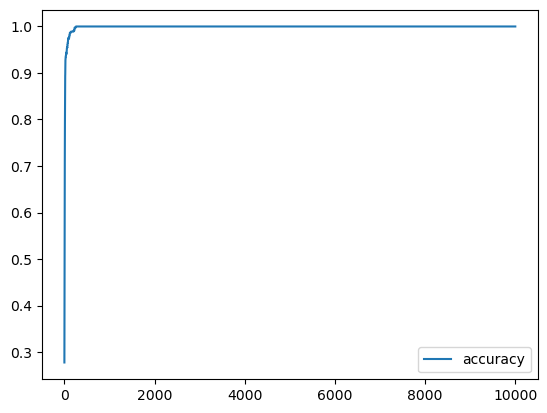

In [14]:
# 학습 모델 손실 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
# 반복횟수가 많아 질 수록 정확도 높아짐

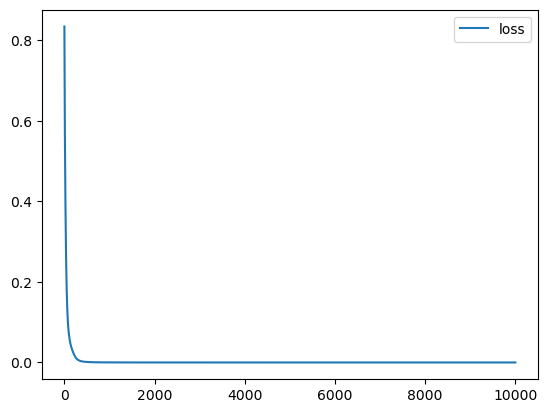

In [16]:
# 학습모델 loss 시각화
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()
# 반복횟 수가 많아질수록 loss줄어듦 (학습이 잘 된 모양)

### 그렇지만!!!! 학습데이터로 찍은 그래프이기 때문에 잘 예측한다고 할 수 없음

학습용과 검증용 데이터로 나눠야함

In [17]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
# validation_data : 검증용으로 사용할 데이터 ## 내가 오타내서 반복횟수 2000으로 줄임
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/2000
1/1 [==============================] - 0s 72ms/step - loss: 1.6101e-09 - accuracy: 1.0000 - val_loss: 1.7073e-09 - val_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.6058e-09 - accuracy: 1.0000 - val_loss: 1.7014e-09 - val_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.5981e-09 - accuracy: 1.0000 - val_loss: 1.6931e-09 - val_accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.5873e-09 - accuracy: 1.0000 - val_loss: 1.6827e-09 - val_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.5741e-09 - accuracy: 1.0000 - val_loss: 1.6704e-09 - val_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.5590e-09 - accuracy: 1.0000 - val_loss: 1.6568e-09 - val_accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.5424e-09 - accuracy: 1.0000 - v

Epoch 56/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2685e-09 - accuracy: 1.0000 - val_loss: 1.4639e-09 - val_accuracy: 1.0000
Epoch 57/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2681e-09 - accuracy: 1.0000 - val_loss: 1.4648e-09 - val_accuracy: 1.0000
Epoch 58/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2676e-09 - accuracy: 1.0000 - val_loss: 1.4657e-09 - val_accuracy: 1.0000
Epoch 59/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.2672e-09 - accuracy: 1.0000 - val_loss: 1.4667e-09 - val_accuracy: 1.0000
Epoch 60/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.2668e-09 - accuracy: 1.0000 - val_loss: 1.4677e-09 - val_accuracy: 1.0000
Epoch 61/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2664e-09 - accuracy: 1.0000 - val_loss: 1.4687e-09 - val_accuracy: 1.0000
Epoch 62/2000
1/1 [==============================] - 0s 53ms/step - loss: 1.2660e-09 - accuracy: 1.0

1/1 [==============================] - 0s 36ms/step - loss: 1.2587e-09 - accuracy: 1.0000 - val_loss: 1.5181e-09 - val_accuracy: 1.0000
Epoch 111/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2590e-09 - accuracy: 1.0000 - val_loss: 1.5193e-09 - val_accuracy: 1.0000
Epoch 112/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2593e-09 - accuracy: 1.0000 - val_loss: 1.5205e-09 - val_accuracy: 1.0000
Epoch 113/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2596e-09 - accuracy: 1.0000 - val_loss: 1.5217e-09 - val_accuracy: 1.0000
Epoch 114/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2600e-09 - accuracy: 1.0000 - val_loss: 1.5229e-09 - val_accuracy: 1.0000
Epoch 115/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2603e-09 - accuracy: 1.0000 - val_loss: 1.5241e-09 - val_accuracy: 1.0000
Epoch 116/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2607e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 37ms/step - loss: 1.2651e-09 - accuracy: 1.0000 - val_loss: 1.5533e-09 - val_accuracy: 1.0000
Epoch 165/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2653e-09 - accuracy: 1.0000 - val_loss: 1.5542e-09 - val_accuracy: 1.0000
Epoch 166/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2655e-09 - accuracy: 1.0000 - val_loss: 1.5550e-09 - val_accuracy: 1.0000
Epoch 167/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2657e-09 - accuracy: 1.0000 - val_loss: 1.5560e-09 - val_accuracy: 1.0000
Epoch 168/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2660e-09 - accuracy: 1.0000 - val_loss: 1.5570e-09 - val_accuracy: 1.0000
Epoch 169/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2662e-09 - accuracy: 1.0000 - val_loss: 1.5581e-09 - val_accuracy: 1.0000
Epoch 170/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.2665e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 39ms/step - loss: 1.2704e-09 - accuracy: 1.0000 - val_loss: 1.5878e-09 - val_accuracy: 1.0000
Epoch 219/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2705e-09 - accuracy: 1.0000 - val_loss: 1.5884e-09 - val_accuracy: 1.0000
Epoch 220/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2708e-09 - accuracy: 1.0000 - val_loss: 1.5892e-09 - val_accuracy: 1.0000
Epoch 221/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.2712e-09 - accuracy: 1.0000 - val_loss: 1.5900e-09 - val_accuracy: 1.0000
Epoch 222/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.2716e-09 - accuracy: 1.0000 - val_loss: 1.5908e-09 - val_accuracy: 1.0000
Epoch 223/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2719e-09 - accuracy: 1.0000 - val_loss: 1.5915e-09 - val_accuracy: 1.0000
Epoch 224/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2721e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 40ms/step - loss: 1.2781e-09 - accuracy: 1.0000 - val_loss: 1.6224e-09 - val_accuracy: 1.0000
Epoch 273/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.2777e-09 - accuracy: 1.0000 - val_loss: 1.6228e-09 - val_accuracy: 1.0000
Epoch 274/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2774e-09 - accuracy: 1.0000 - val_loss: 1.6231e-09 - val_accuracy: 1.0000
Epoch 275/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2769e-09 - accuracy: 1.0000 - val_loss: 1.6235e-09 - val_accuracy: 1.0000
Epoch 276/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.2766e-09 - accuracy: 1.0000 - val_loss: 1.6242e-09 - val_accuracy: 1.0000
Epoch 277/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.2765e-09 - accuracy: 1.0000 - val_loss: 1.6249e-09 - val_accuracy: 1.0000
Epoch 278/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2763e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 37ms/step - loss: 1.2705e-09 - accuracy: 1.0000 - val_loss: 1.6448e-09 - val_accuracy: 1.0000
Epoch 327/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2703e-09 - accuracy: 1.0000 - val_loss: 1.6456e-09 - val_accuracy: 1.0000
Epoch 328/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2702e-09 - accuracy: 1.0000 - val_loss: 1.6466e-09 - val_accuracy: 1.0000
Epoch 329/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2704e-09 - accuracy: 1.0000 - val_loss: 1.6475e-09 - val_accuracy: 1.0000
Epoch 330/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2704e-09 - accuracy: 1.0000 - val_loss: 1.6483e-09 - val_accuracy: 1.0000
Epoch 331/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2704e-09 - accuracy: 1.0000 - val_loss: 1.6479e-09 - val_accuracy: 1.0000
Epoch 332/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2700e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 50ms/step - loss: 1.2677e-09 - accuracy: 1.0000 - val_loss: 1.6687e-09 - val_accuracy: 1.0000
Epoch 381/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2678e-09 - accuracy: 1.0000 - val_loss: 1.6695e-09 - val_accuracy: 1.0000
Epoch 382/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.2680e-09 - accuracy: 1.0000 - val_loss: 1.6699e-09 - val_accuracy: 1.0000
Epoch 383/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2674e-09 - accuracy: 1.0000 - val_loss: 1.6705e-09 - val_accuracy: 1.0000
Epoch 384/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2671e-09 - accuracy: 1.0000 - val_loss: 1.6712e-09 - val_accuracy: 1.0000
Epoch 385/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2669e-09 - accuracy: 1.0000 - val_loss: 1.6708e-09 - val_accuracy: 1.0000
Epoch 386/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2664e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 37ms/step - loss: 1.2621e-09 - accuracy: 1.0000 - val_loss: 1.6909e-09 - val_accuracy: 1.0000
Epoch 435/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.2621e-09 - accuracy: 1.0000 - val_loss: 1.6913e-09 - val_accuracy: 1.0000
Epoch 436/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2619e-09 - accuracy: 1.0000 - val_loss: 1.6917e-09 - val_accuracy: 1.0000
Epoch 437/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2618e-09 - accuracy: 1.0000 - val_loss: 1.6924e-09 - val_accuracy: 1.0000
Epoch 438/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2619e-09 - accuracy: 1.0000 - val_loss: 1.6932e-09 - val_accuracy: 1.0000
Epoch 439/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2620e-09 - accuracy: 1.0000 - val_loss: 1.6942e-09 - val_accuracy: 1.0000
Epoch 440/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2624e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 37ms/step - loss: 1.2593e-09 - accuracy: 1.0000 - val_loss: 1.7160e-09 - val_accuracy: 1.0000
Epoch 489/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2590e-09 - accuracy: 1.0000 - val_loss: 1.7159e-09 - val_accuracy: 1.0000
Epoch 490/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2588e-09 - accuracy: 1.0000 - val_loss: 1.7161e-09 - val_accuracy: 1.0000
Epoch 491/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.2588e-09 - accuracy: 1.0000 - val_loss: 1.7163e-09 - val_accuracy: 1.0000
Epoch 492/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.2587e-09 - accuracy: 1.0000 - val_loss: 1.7167e-09 - val_accuracy: 1.0000
Epoch 493/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2588e-09 - accuracy: 1.0000 - val_loss: 1.7173e-09 - val_accuracy: 1.0000
Epoch 494/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.2590e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 43ms/step - loss: 1.2559e-09 - accuracy: 1.0000 - val_loss: 1.7394e-09 - val_accuracy: 1.0000
Epoch 543/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2562e-09 - accuracy: 1.0000 - val_loss: 1.7399e-09 - val_accuracy: 1.0000
Epoch 544/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2560e-09 - accuracy: 1.0000 - val_loss: 1.7404e-09 - val_accuracy: 1.0000
Epoch 545/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2557e-09 - accuracy: 1.0000 - val_loss: 1.7407e-09 - val_accuracy: 1.0000
Epoch 546/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2554e-09 - accuracy: 1.0000 - val_loss: 1.7414e-09 - val_accuracy: 1.0000
Epoch 547/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.2553e-09 - accuracy: 1.0000 - val_loss: 1.7422e-09 - val_accuracy: 1.0000
Epoch 548/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2554e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 37ms/step - loss: 1.2539e-09 - accuracy: 1.0000 - val_loss: 1.7648e-09 - val_accuracy: 1.0000
Epoch 597/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2536e-09 - accuracy: 1.0000 - val_loss: 1.7656e-09 - val_accuracy: 1.0000
Epoch 598/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.2536e-09 - accuracy: 1.0000 - val_loss: 1.7666e-09 - val_accuracy: 1.0000
Epoch 599/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.2537e-09 - accuracy: 1.0000 - val_loss: 1.7663e-09 - val_accuracy: 1.0000
Epoch 600/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.2532e-09 - accuracy: 1.0000 - val_loss: 1.7664e-09 - val_accuracy: 1.0000
Epoch 601/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.2530e-09 - accuracy: 1.0000 - val_loss: 1.7664e-09 - val_accuracy: 1.0000
Epoch 602/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.2528e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 43ms/step - loss: 1.2358e-09 - accuracy: 1.0000 - val_loss: 1.7743e-09 - val_accuracy: 1.0000
Epoch 651/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.2359e-09 - accuracy: 1.0000 - val_loss: 1.7745e-09 - val_accuracy: 1.0000
Epoch 652/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.2359e-09 - accuracy: 1.0000 - val_loss: 1.7750e-09 - val_accuracy: 1.0000
Epoch 653/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.2361e-09 - accuracy: 1.0000 - val_loss: 1.7758e-09 - val_accuracy: 1.0000
Epoch 654/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2361e-09 - accuracy: 1.0000 - val_loss: 1.7766e-09 - val_accuracy: 1.0000
Epoch 655/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2360e-09 - accuracy: 1.0000 - val_loss: 1.7777e-09 - val_accuracy: 1.0000
Epoch 656/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.2361e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 39ms/step - loss: 1.2381e-09 - accuracy: 1.0000 - val_loss: 1.8040e-09 - val_accuracy: 1.0000
Epoch 705/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2382e-09 - accuracy: 1.0000 - val_loss: 1.8046e-09 - val_accuracy: 1.0000
Epoch 706/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.2384e-09 - accuracy: 1.0000 - val_loss: 1.8054e-09 - val_accuracy: 1.0000
Epoch 707/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.2387e-09 - accuracy: 1.0000 - val_loss: 1.8065e-09 - val_accuracy: 1.0000
Epoch 708/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.2392e-09 - accuracy: 1.0000 - val_loss: 1.8073e-09 - val_accuracy: 1.0000
Epoch 709/2000
1/1 [==============================] - 0s 39ms/step - loss: 1.2394e-09 - accuracy: 1.0000 - val_loss: 1.8075e-09 - val_accuracy: 1.0000
Epoch 710/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.2386e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 51ms/step - loss: 1.2256e-09 - accuracy: 1.0000 - val_loss: 1.8195e-09 - val_accuracy: 1.0000
Epoch 759/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.2251e-09 - accuracy: 1.0000 - val_loss: 1.8196e-09 - val_accuracy: 1.0000
Epoch 760/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.2245e-09 - accuracy: 1.0000 - val_loss: 1.8200e-09 - val_accuracy: 1.0000
Epoch 761/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.2241e-09 - accuracy: 1.0000 - val_loss: 1.8206e-09 - val_accuracy: 1.0000
Epoch 762/2000
1/1 [==============================] - 0s 54ms/step - loss: 1.2239e-09 - accuracy: 1.0000 - val_loss: 1.8215e-09 - val_accuracy: 1.0000
Epoch 763/2000
1/1 [==============================] - 0s 59ms/step - loss: 1.2239e-09 - accuracy: 1.0000 - val_loss: 1.8225e-09 - val_accuracy: 1.0000
Epoch 764/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.2240e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 47ms/step - loss: 1.2251e-09 - accuracy: 1.0000 - val_loss: 1.8467e-09 - val_accuracy: 1.0000
Epoch 813/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2250e-09 - accuracy: 1.0000 - val_loss: 1.8471e-09 - val_accuracy: 1.0000
Epoch 814/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2250e-09 - accuracy: 1.0000 - val_loss: 1.8477e-09 - val_accuracy: 1.0000
Epoch 815/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2252e-09 - accuracy: 1.0000 - val_loss: 1.8486e-09 - val_accuracy: 1.0000
Epoch 816/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2255e-09 - accuracy: 1.0000 - val_loss: 1.8497e-09 - val_accuracy: 1.0000
Epoch 817/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.2259e-09 - accuracy: 1.0000 - val_loss: 1.8510e-09 - val_accuracy: 1.0000
Epoch 818/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2265e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 46ms/step - loss: 1.2227e-09 - accuracy: 1.0000 - val_loss: 1.8684e-09 - val_accuracy: 1.0000
Epoch 867/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.2207e-09 - accuracy: 1.0000 - val_loss: 1.8680e-09 - val_accuracy: 1.0000
Epoch 868/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.2191e-09 - accuracy: 1.0000 - val_loss: 1.8679e-09 - val_accuracy: 1.0000
Epoch 869/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.2179e-09 - accuracy: 1.0000 - val_loss: 1.8678e-09 - val_accuracy: 1.0000
Epoch 870/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.2166e-09 - accuracy: 1.0000 - val_loss: 1.8679e-09 - val_accuracy: 1.0000
Epoch 871/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.2157e-09 - accuracy: 1.0000 - val_loss: 1.8663e-09 - val_accuracy: 1.0000
Epoch 872/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.2144e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 39ms/step - loss: 1.2122e-09 - accuracy: 1.0000 - val_loss: 1.8866e-09 - val_accuracy: 1.0000
Epoch 921/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.2120e-09 - accuracy: 1.0000 - val_loss: 1.8870e-09 - val_accuracy: 1.0000
Epoch 922/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.2121e-09 - accuracy: 1.0000 - val_loss: 1.8875e-09 - val_accuracy: 1.0000
Epoch 923/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.2122e-09 - accuracy: 1.0000 - val_loss: 1.8884e-09 - val_accuracy: 1.0000
Epoch 924/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.2125e-09 - accuracy: 1.0000 - val_loss: 1.8894e-09 - val_accuracy: 1.0000
Epoch 925/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.2129e-09 - accuracy: 1.0000 - val_loss: 1.8903e-09 - val_accuracy: 1.0000
Epoch 926/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.2129e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 48ms/step - loss: 1.2104e-09 - accuracy: 1.0000 - val_loss: 1.9121e-09 - val_accuracy: 1.0000
Epoch 975/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.2103e-09 - accuracy: 1.0000 - val_loss: 1.9124e-09 - val_accuracy: 1.0000
Epoch 976/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.2104e-09 - accuracy: 1.0000 - val_loss: 1.9130e-09 - val_accuracy: 1.0000
Epoch 977/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2106e-09 - accuracy: 1.0000 - val_loss: 1.9134e-09 - val_accuracy: 1.0000
Epoch 978/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.2107e-09 - accuracy: 1.0000 - val_loss: 1.9136e-09 - val_accuracy: 1.0000
Epoch 979/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2107e-09 - accuracy: 1.0000 - val_loss: 1.9141e-09 - val_accuracy: 1.0000
Epoch 980/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.2108e-09 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 44ms/step - loss: 1.1996e-09 - accuracy: 1.0000 - val_loss: 1.9312e-09 - val_accuracy: 1.0000
Epoch 1029/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1994e-09 - accuracy: 1.0000 - val_loss: 1.9321e-09 - val_accuracy: 1.0000
Epoch 1030/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1994e-09 - accuracy: 1.0000 - val_loss: 1.9312e-09 - val_accuracy: 1.0000
Epoch 1031/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1991e-09 - accuracy: 1.0000 - val_loss: 1.9307e-09 - val_accuracy: 1.0000
Epoch 1032/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1990e-09 - accuracy: 1.0000 - val_loss: 1.9306e-09 - val_accuracy: 1.0000
Epoch 1033/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1990e-09 - accuracy: 1.0000 - val_loss: 1.9307e-09 - val_accuracy: 1.0000
Epoch 1034/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1992e-09 - accuracy: 1.000

1/1 [==============================] - 0s 50ms/step - loss: 1.1990e-09 - accuracy: 1.0000 - val_loss: 1.9511e-09 - val_accuracy: 1.0000
Epoch 1083/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1981e-09 - accuracy: 1.0000 - val_loss: 1.9514e-09 - val_accuracy: 1.0000
Epoch 1084/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1974e-09 - accuracy: 1.0000 - val_loss: 1.9521e-09 - val_accuracy: 1.0000
Epoch 1085/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1969e-09 - accuracy: 1.0000 - val_loss: 1.9529e-09 - val_accuracy: 1.0000
Epoch 1086/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1966e-09 - accuracy: 1.0000 - val_loss: 1.9540e-09 - val_accuracy: 1.0000
Epoch 1087/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1965e-09 - accuracy: 1.0000 - val_loss: 1.9553e-09 - val_accuracy: 1.0000
Epoch 1088/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1965e-09 - accuracy: 1.000

1/1 [==============================] - 0s 45ms/step - loss: 1.1816e-09 - accuracy: 1.0000 - val_loss: 1.9588e-09 - val_accuracy: 1.0000
Epoch 1137/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1819e-09 - accuracy: 1.0000 - val_loss: 1.9601e-09 - val_accuracy: 1.0000
Epoch 1138/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1823e-09 - accuracy: 1.0000 - val_loss: 1.9614e-09 - val_accuracy: 1.0000
Epoch 1139/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1824e-09 - accuracy: 1.0000 - val_loss: 1.9630e-09 - val_accuracy: 1.0000
Epoch 1140/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.1827e-09 - accuracy: 1.0000 - val_loss: 1.9646e-09 - val_accuracy: 1.0000
Epoch 1141/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1831e-09 - accuracy: 1.0000 - val_loss: 1.9658e-09 - val_accuracy: 1.0000
Epoch 1142/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1833e-09 - accuracy: 1.000

1/1 [==============================] - 0s 47ms/step - loss: 1.1870e-09 - accuracy: 1.0000 - val_loss: 1.9955e-09 - val_accuracy: 1.0000
Epoch 1191/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1867e-09 - accuracy: 1.0000 - val_loss: 1.9964e-09 - val_accuracy: 1.0000
Epoch 1192/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1866e-09 - accuracy: 1.0000 - val_loss: 1.9975e-09 - val_accuracy: 1.0000
Epoch 1193/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1866e-09 - accuracy: 1.0000 - val_loss: 1.9988e-09 - val_accuracy: 1.0000
Epoch 1194/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.1867e-09 - accuracy: 1.0000 - val_loss: 2.0003e-09 - val_accuracy: 1.0000
Epoch 1195/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1870e-09 - accuracy: 1.0000 - val_loss: 1.9987e-09 - val_accuracy: 1.0000
Epoch 1196/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1864e-09 - accuracy: 1.000

1/1 [==============================] - 0s 43ms/step - loss: 1.1861e-09 - accuracy: 1.0000 - val_loss: 2.0198e-09 - val_accuracy: 1.0000
Epoch 1245/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1863e-09 - accuracy: 1.0000 - val_loss: 2.0203e-09 - val_accuracy: 1.0000
Epoch 1246/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1866e-09 - accuracy: 1.0000 - val_loss: 2.0210e-09 - val_accuracy: 1.0000
Epoch 1247/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1870e-09 - accuracy: 1.0000 - val_loss: 2.0209e-09 - val_accuracy: 1.0000
Epoch 1248/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1870e-09 - accuracy: 1.0000 - val_loss: 2.0203e-09 - val_accuracy: 1.0000
Epoch 1249/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1867e-09 - accuracy: 1.0000 - val_loss: 2.0189e-09 - val_accuracy: 1.0000
Epoch 1250/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.1845e-09 - accuracy: 1.000

1/1 [==============================] - 0s 43ms/step - loss: 1.1755e-09 - accuracy: 1.0000 - val_loss: 2.0358e-09 - val_accuracy: 1.0000
Epoch 1299/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1753e-09 - accuracy: 1.0000 - val_loss: 2.0358e-09 - val_accuracy: 1.0000
Epoch 1300/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1749e-09 - accuracy: 1.0000 - val_loss: 2.0361e-09 - val_accuracy: 1.0000
Epoch 1301/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1746e-09 - accuracy: 1.0000 - val_loss: 2.0368e-09 - val_accuracy: 1.0000
Epoch 1302/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1745e-09 - accuracy: 1.0000 - val_loss: 2.0376e-09 - val_accuracy: 1.0000
Epoch 1303/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1745e-09 - accuracy: 1.0000 - val_loss: 2.0388e-09 - val_accuracy: 1.0000
Epoch 1304/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1747e-09 - accuracy: 1.000

1/1 [==============================] - 0s 41ms/step - loss: 1.1745e-09 - accuracy: 1.0000 - val_loss: 2.0620e-09 - val_accuracy: 1.0000
Epoch 1353/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1744e-09 - accuracy: 1.0000 - val_loss: 2.0630e-09 - val_accuracy: 1.0000
Epoch 1354/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1744e-09 - accuracy: 1.0000 - val_loss: 2.0642e-09 - val_accuracy: 1.0000
Epoch 1355/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1746e-09 - accuracy: 1.0000 - val_loss: 2.0656e-09 - val_accuracy: 1.0000
Epoch 1356/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1749e-09 - accuracy: 1.0000 - val_loss: 2.0649e-09 - val_accuracy: 1.0000
Epoch 1357/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1748e-09 - accuracy: 1.0000 - val_loss: 2.0646e-09 - val_accuracy: 1.0000
Epoch 1358/2000
1/1 [==============================] - 0s 40ms/step - loss: 1.1749e-09 - accuracy: 1.000

1/1 [==============================] - 0s 42ms/step - loss: 1.1626e-09 - accuracy: 1.0000 - val_loss: 2.0775e-09 - val_accuracy: 1.0000
Epoch 1407/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1626e-09 - accuracy: 1.0000 - val_loss: 2.0770e-09 - val_accuracy: 1.0000
Epoch 1408/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1624e-09 - accuracy: 1.0000 - val_loss: 2.0769e-09 - val_accuracy: 1.0000
Epoch 1409/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1624e-09 - accuracy: 1.0000 - val_loss: 2.0770e-09 - val_accuracy: 1.0000
Epoch 1410/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1623e-09 - accuracy: 1.0000 - val_loss: 2.0775e-09 - val_accuracy: 1.0000
Epoch 1411/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1624e-09 - accuracy: 1.0000 - val_loss: 2.0775e-09 - val_accuracy: 1.0000
Epoch 1412/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1623e-09 - accuracy: 1.000

1/1 [==============================] - 0s 50ms/step - loss: 1.1618e-09 - accuracy: 1.0000 - val_loss: 2.0985e-09 - val_accuracy: 1.0000
Epoch 1461/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1616e-09 - accuracy: 1.0000 - val_loss: 2.0986e-09 - val_accuracy: 1.0000
Epoch 1462/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.1616e-09 - accuracy: 1.0000 - val_loss: 2.0991e-09 - val_accuracy: 1.0000
Epoch 1463/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1617e-09 - accuracy: 1.0000 - val_loss: 2.0999e-09 - val_accuracy: 1.0000
Epoch 1464/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1619e-09 - accuracy: 1.0000 - val_loss: 2.1010e-09 - val_accuracy: 1.0000
Epoch 1465/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1623e-09 - accuracy: 1.0000 - val_loss: 2.1015e-09 - val_accuracy: 1.0000
Epoch 1466/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1624e-09 - accuracy: 1.000

1/1 [==============================] - 0s 43ms/step - loss: 1.1609e-09 - accuracy: 1.0000 - val_loss: 2.1223e-09 - val_accuracy: 1.0000
Epoch 1515/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1611e-09 - accuracy: 1.0000 - val_loss: 2.1233e-09 - val_accuracy: 1.0000
Epoch 1516/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1614e-09 - accuracy: 1.0000 - val_loss: 2.1240e-09 - val_accuracy: 1.0000
Epoch 1517/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1615e-09 - accuracy: 1.0000 - val_loss: 2.1249e-09 - val_accuracy: 1.0000
Epoch 1518/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1618e-09 - accuracy: 1.0000 - val_loss: 2.1261e-09 - val_accuracy: 1.0000
Epoch 1519/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1622e-09 - accuracy: 1.0000 - val_loss: 2.1275e-09 - val_accuracy: 1.0000
Epoch 1520/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1626e-09 - accuracy: 1.000

1/1 [==============================] - 0s 43ms/step - loss: 1.1485e-09 - accuracy: 1.0000 - val_loss: 2.1388e-09 - val_accuracy: 1.0000
Epoch 1569/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1484e-09 - accuracy: 1.0000 - val_loss: 2.1396e-09 - val_accuracy: 1.0000
Epoch 1570/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1485e-09 - accuracy: 1.0000 - val_loss: 2.1407e-09 - val_accuracy: 1.0000
Epoch 1571/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1487e-09 - accuracy: 1.0000 - val_loss: 2.1420e-09 - val_accuracy: 1.0000
Epoch 1572/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1490e-09 - accuracy: 1.0000 - val_loss: 2.1436e-09 - val_accuracy: 1.0000
Epoch 1573/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1494e-09 - accuracy: 1.0000 - val_loss: 2.1445e-09 - val_accuracy: 1.0000
Epoch 1574/2000
1/1 [==============================] - 0s 41ms/step - loss: 1.1496e-09 - accuracy: 1.000

1/1 [==============================] - 0s 47ms/step - loss: 1.1519e-09 - accuracy: 1.0000 - val_loss: 2.1662e-09 - val_accuracy: 1.0000
Epoch 1623/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.1523e-09 - accuracy: 1.0000 - val_loss: 2.1677e-09 - val_accuracy: 1.0000
Epoch 1624/2000
1/1 [==============================] - 0s 43ms/step - loss: 1.1527e-09 - accuracy: 1.0000 - val_loss: 2.1681e-09 - val_accuracy: 1.0000
Epoch 1625/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1523e-09 - accuracy: 1.0000 - val_loss: 2.1689e-09 - val_accuracy: 1.0000
Epoch 1626/2000
1/1 [==============================] - 0s 42ms/step - loss: 1.1520e-09 - accuracy: 1.0000 - val_loss: 2.1699e-09 - val_accuracy: 1.0000
Epoch 1627/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1518e-09 - accuracy: 1.0000 - val_loss: 2.1704e-09 - val_accuracy: 1.0000
Epoch 1628/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.1515e-09 - accuracy: 1.000

1/1 [==============================] - 0s 46ms/step - loss: 1.1526e-09 - accuracy: 1.0000 - val_loss: 2.1924e-09 - val_accuracy: 1.0000
Epoch 1677/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.1528e-09 - accuracy: 1.0000 - val_loss: 2.1932e-09 - val_accuracy: 1.0000
Epoch 1678/2000
1/1 [==============================] - 0s 45ms/step - loss: 1.1524e-09 - accuracy: 1.0000 - val_loss: 2.1935e-09 - val_accuracy: 1.0000
Epoch 1679/2000
1/1 [==============================] - 0s 46ms/step - loss: 1.1519e-09 - accuracy: 1.0000 - val_loss: 2.1940e-09 - val_accuracy: 1.0000
Epoch 1680/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1515e-09 - accuracy: 1.0000 - val_loss: 2.1949e-09 - val_accuracy: 1.0000
Epoch 1681/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1513e-09 - accuracy: 1.0000 - val_loss: 2.1960e-09 - val_accuracy: 1.0000
Epoch 1682/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1513e-09 - accuracy: 1.000

1/1 [==============================] - 0s 48ms/step - loss: 1.1382e-09 - accuracy: 1.0000 - val_loss: 2.2046e-09 - val_accuracy: 1.0000
Epoch 1731/2000
1/1 [==============================] - 0s 53ms/step - loss: 1.1385e-09 - accuracy: 1.0000 - val_loss: 2.2058e-09 - val_accuracy: 1.0000
Epoch 1732/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1389e-09 - accuracy: 1.0000 - val_loss: 2.2063e-09 - val_accuracy: 1.0000
Epoch 1733/2000
1/1 [==============================] - 0s 54ms/step - loss: 1.1389e-09 - accuracy: 1.0000 - val_loss: 2.2068e-09 - val_accuracy: 1.0000
Epoch 1734/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1388e-09 - accuracy: 1.0000 - val_loss: 2.2077e-09 - val_accuracy: 1.0000
Epoch 1735/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.1388e-09 - accuracy: 1.0000 - val_loss: 2.2088e-09 - val_accuracy: 1.0000
Epoch 1736/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1389e-09 - accuracy: 1.000

1/1 [==============================] - 0s 46ms/step - loss: 1.1401e-09 - accuracy: 1.0000 - val_loss: 2.2315e-09 - val_accuracy: 1.0000
Epoch 1785/2000
1/1 [==============================] - 0s 44ms/step - loss: 1.1400e-09 - accuracy: 1.0000 - val_loss: 2.2309e-09 - val_accuracy: 1.0000
Epoch 1786/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.1397e-09 - accuracy: 1.0000 - val_loss: 2.2308e-09 - val_accuracy: 1.0000
Epoch 1787/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1396e-09 - accuracy: 1.0000 - val_loss: 2.2311e-09 - val_accuracy: 1.0000
Epoch 1788/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.1396e-09 - accuracy: 1.0000 - val_loss: 2.2316e-09 - val_accuracy: 1.0000
Epoch 1789/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1398e-09 - accuracy: 1.0000 - val_loss: 2.2325e-09 - val_accuracy: 1.0000
Epoch 1790/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.1400e-09 - accuracy: 1.000

1/1 [==============================] - 0s 54ms/step - loss: 1.1409e-09 - accuracy: 1.0000 - val_loss: 2.2551e-09 - val_accuracy: 1.0000
Epoch 1839/2000
1/1 [==============================] - 0s 56ms/step - loss: 1.1405e-09 - accuracy: 1.0000 - val_loss: 2.2552e-09 - val_accuracy: 1.0000
Epoch 1840/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1403e-09 - accuracy: 1.0000 - val_loss: 2.2556e-09 - val_accuracy: 1.0000
Epoch 1841/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.1402e-09 - accuracy: 1.0000 - val_loss: 2.2563e-09 - val_accuracy: 1.0000
Epoch 1842/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.1402e-09 - accuracy: 1.0000 - val_loss: 2.2572e-09 - val_accuracy: 1.0000
Epoch 1843/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.1404e-09 - accuracy: 1.0000 - val_loss: 2.2585e-09 - val_accuracy: 1.0000
Epoch 1844/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1406e-09 - accuracy: 1.000

1/1 [==============================] - 0s 50ms/step - loss: 1.1290e-09 - accuracy: 1.0000 - val_loss: 2.2730e-09 - val_accuracy: 1.0000
Epoch 1893/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1281e-09 - accuracy: 1.0000 - val_loss: 2.2722e-09 - val_accuracy: 1.0000
Epoch 1894/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.1275e-09 - accuracy: 1.0000 - val_loss: 2.2718e-09 - val_accuracy: 1.0000
Epoch 1895/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.1270e-09 - accuracy: 1.0000 - val_loss: 2.2718e-09 - val_accuracy: 1.0000
Epoch 1896/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.1267e-09 - accuracy: 1.0000 - val_loss: 2.2721e-09 - val_accuracy: 1.0000
Epoch 1897/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1266e-09 - accuracy: 1.0000 - val_loss: 2.2718e-09 - val_accuracy: 1.0000
Epoch 1898/2000
1/1 [==============================] - 0s 48ms/step - loss: 1.1262e-09 - accuracy: 1.000

1/1 [==============================] - 0s 53ms/step - loss: 1.1290e-09 - accuracy: 1.0000 - val_loss: 2.2994e-09 - val_accuracy: 1.0000
Epoch 1947/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.1288e-09 - accuracy: 1.0000 - val_loss: 2.3003e-09 - val_accuracy: 1.0000
Epoch 1948/2000
1/1 [==============================] - 0s 50ms/step - loss: 1.1287e-09 - accuracy: 1.0000 - val_loss: 2.3015e-09 - val_accuracy: 1.0000
Epoch 1949/2000
1/1 [==============================] - 0s 49ms/step - loss: 1.1288e-09 - accuracy: 1.0000 - val_loss: 2.3029e-09 - val_accuracy: 1.0000
Epoch 1950/2000
1/1 [==============================] - 0s 52ms/step - loss: 1.1289e-09 - accuracy: 1.0000 - val_loss: 2.3044e-09 - val_accuracy: 1.0000
Epoch 1951/2000
1/1 [==============================] - 0s 58ms/step - loss: 1.1292e-09 - accuracy: 1.0000 - val_loss: 2.3020e-09 - val_accuracy: 1.0000
Epoch 1952/2000
1/1 [==============================] - 0s 51ms/step - loss: 1.1287e-09 - accuracy: 1.000

1/1 [==============================] - 0s 47ms/step - loss: 1.1308e-09 - accuracy: 1.0000 - val_loss: 2.3237e-09 - val_accuracy: 1.0000


In [32]:
# history.history 하면 볼 수 있다
history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

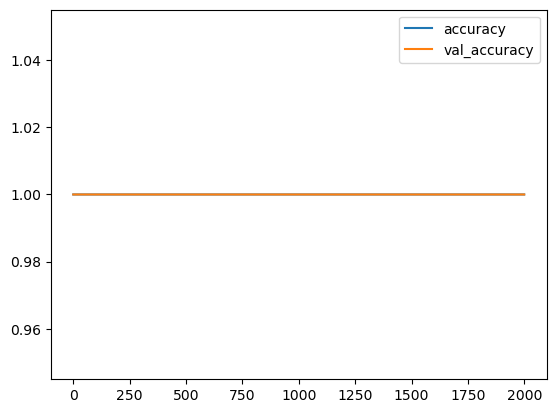

In [33]:
# 학습 모델 손실 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# 씨발 이렇게 나오면 안되는데

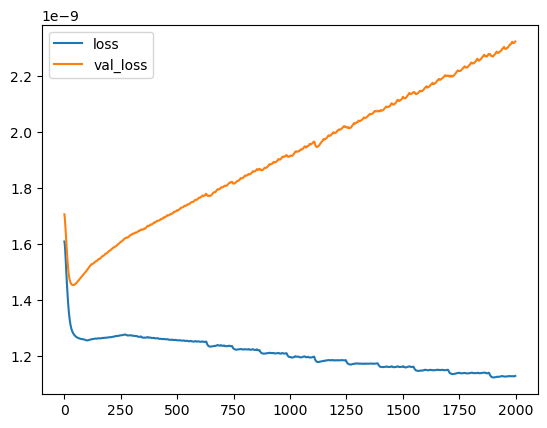

In [29]:
# 학습모델 loss 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 반복횟 수가 많아지니까 학습 오차는 줄지만 val_loss는 올라감

## 케라스 : val_loss봐서 학습중단시점을 결정해준다

In [37]:
# 조기중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않으면 학습중단
# patience : 손실률을 몇 번을 더 볼것인가를 설정한다 손실률 개선 안돼도 몇 번 반복 할 지
# 그동안 개선 안되면 중단함.!
callback1 = EarlyStopping(monitor='val_loss', patience = 50) # 50번 내에 개선 안되면 중단

NameError: name 'callback' is not defined

In [ ]:
# callbacks : 조기중단 자동저장을 설정한다.

In [42]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test),
                   callbacks=[callback1])

Epoch 1/10000
1/1 [==============================] - 0s 74ms/step - loss: 1.1213e-09 - accuracy: 1.0000 - val_loss: 2.3675e-09 - val_accuracy: 1.0000
Epoch 2/10000
1/1 [==============================] - 0s 38ms/step - loss: 1.1200e-09 - accuracy: 1.0000 - val_loss: 2.3653e-09 - val_accuracy: 1.0000
Epoch 3/10000
1/1 [==============================] - 0s 40ms/step - loss: 1.1190e-09 - accuracy: 1.0000 - val_loss: 2.3638e-09 - val_accuracy: 1.0000
Epoch 4/10000
1/1 [==============================] - 0s 44ms/step - loss: 1.1181e-09 - accuracy: 1.0000 - val_loss: 2.3627e-09 - val_accuracy: 1.0000
Epoch 5/10000
1/1 [==============================] - 0s 41ms/step - loss: 1.1175e-09 - accuracy: 1.0000 - val_loss: 2.3621e-09 - val_accuracy: 1.0000
Epoch 6/10000
1/1 [==============================] - 0s 36ms/step - loss: 1.1170e-09 - accuracy: 1.0000 - val_loss: 2.3619e-09 - val_accuracy: 1.0000
Epoch 7/10000
1/1 [==============================] - 0s 39ms/step - loss: 1.1167e-09 - accuracy: 1.0

1/1 [==============================] - 0s 38ms/step - loss: 1.1197e-09 - accuracy: 1.0000 - val_loss: 2.3919e-09 - val_accuracy: 1.0000
Epoch 56/10000
1/1 [==============================] - 0s 38ms/step - loss: 1.1201e-09 - accuracy: 1.0000 - val_loss: 2.3928e-09 - val_accuracy: 1.0000


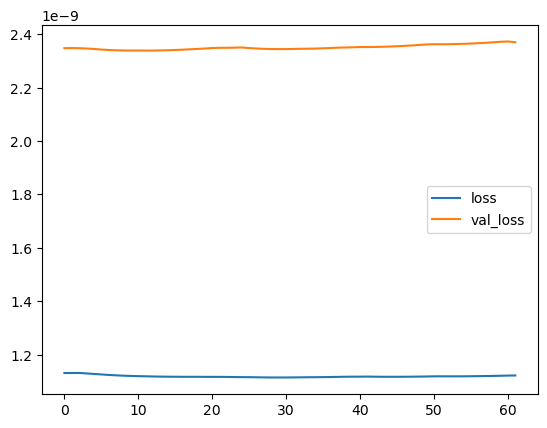

In [39]:
# 학습모델 loss 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 반복횟 수가 많아지니까 학습 오차는 줄지만 val_loss는 올라감

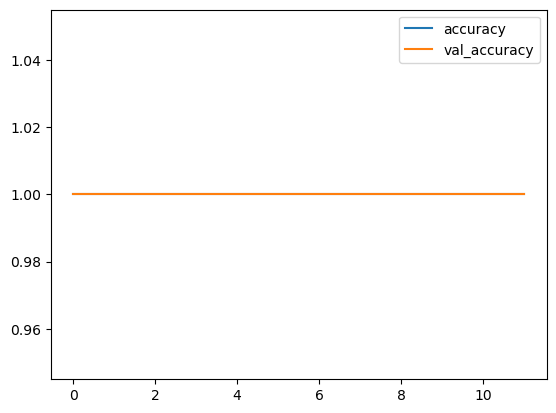

In [40]:
plt.plot(history.history['accuracy'][:-50], label='accuracy')
plt.plot(history.history['val_accuracy'][:-50], label='val_accuracy')
plt.legend()
plt.show()
# 페이션스 50까지 줬으니까 -50빼고 그린거임

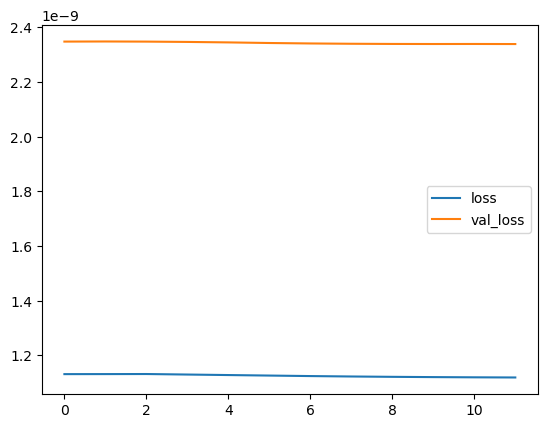

In [41]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()
